# Proyecto 2: Ingeniería de Features, Modelos Avanzados e Interpretación de Modelos

### Resumen del proyecto
Aplica transformación de datos y entrena Modelos Avanzados para
desarrollar con mayor profundidad tu modelo de Machine Learning.
¿Qué puedes aprender del problema que estás abordando mediante
el estudio de tu propio modelo?

### Entregable
Un Notebook de Jupyter con la resolución de la consigna. El Notebook debe
poder ejecutarse sin errores.

### Consigna
En este proyecto profundizarás lo desarrollado en el proyecto 01 (“Primer modelo
de Machine Learning”). El objetivo es aplicar las técnicas incorporadas
(Transformación de Datos, Optimización de Hiperparámetros, Modelos
Avanzados, etc.) para generar un modelo que tenga un mejor desempeño que el
modelo generado en el proyecto anterior. Luego, interpreta ese modelo para
responder la siguiente pregunta: ¿qué podemos aprender de nuestro problema
estudiando el modelo que generamos?

<font color=blue>

¡Hola!, bienvenid@ a esta notebook de preprocesamiento de datos, modelos avanzados y clustering. Mi nombre es Carlos Rodriguez y soy estudiante de Data Science en Acámica, clase DS-ONLINE-20. Mis datos de contacto son carlosd2.rodriguez@gmail.com y +54911 39123146

Todas las celdas de código de esta notebook consisten en la solución a los enunciados de problema, y esos enunciados originales se mantendrán en celdas de Markdown sobre el código con fuente color negro. 

Todos los comentarios y explicaciones de la resolución de este proyecto estarán coloreados en azul.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

C:\Users\Eric\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
data.shape

(146660, 19)

In [3]:
#!pip install folium 
import folium

data_folium = data.dropna() 
data_folium.isnull().sum()

m = folium.Map(location=[data_folium['lat'].mean(), data_folium['lon'].mean()])
tooltip = 'Click me!'

folium.Marker([data_folium['lat'].mean(), data_folium['lon'].mean()], tooltip=tooltip).add_to(m)

m

lat       lon     rooms  bedrooms  bathrooms  \
lat              1.000000 -0.975578 -0.010933  0.007618   0.019923   
lon             -0.975578  1.000000 -0.006931 -0.016905  -0.028612   
rooms           -0.010933 -0.006931  1.000000  0.869769   0.613308   
bedrooms         0.007618 -0.016905  0.869769  1.000000   0.588527   
bathrooms        0.019923 -0.028612  0.613308  0.588527   1.000000   
surface_total   -0.019598 -0.049097  0.081044  0.079229   0.061159   
surface_covered -0.004156 -0.014388  0.075012  0.072627   0.069361   
price            0.013393  0.009368  0.351025  0.316192   0.556861   

                 surface_total  surface_covered     price  
lat                  -0.019598        -0.004156  0.013393  
lon                  -0.049097        -0.014388  0.009368  
rooms                 0.081044         0.075012  0.351025  
bedrooms              0.079229         0.072627  0.316192  
bathrooms             0.061159         0.069361  0.556861  
surface_total         1.000000         0.430887  0.038727  
surface_covered       0.430887         1.000000  0.049136  
price                 0.038727         0.049136  1.000000

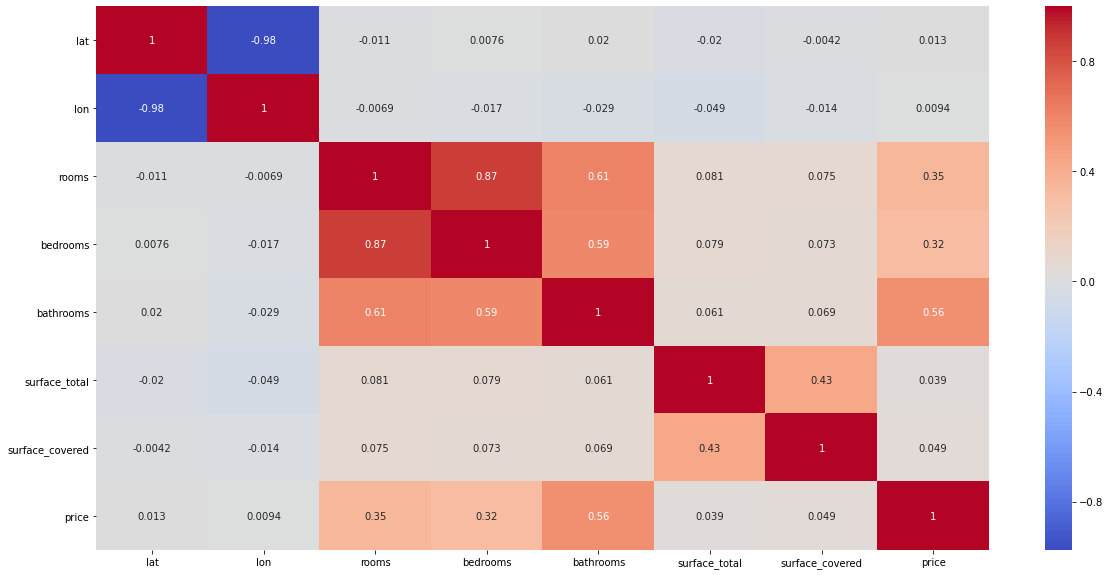

In [4]:
plt.figure(figsize=(20,10))
c= data.corr()
sns.heatmap(c,cmap='coolwarm',annot=True)
c

<font color=blue>
Justificación de elección de las variables predictoras del target (price), siendo estas "l2, l3, rooms, bedrooms, bathrooms, surface_total, surface_covered, property_type":

* Matriz de correlación muestra rooms, bedrooms y bathrooms como relativamente predictoras, dentro de las numéricas.
* Conocimiento previo del efecto de la superficie y tipo de propiedad en el precio
* Incapacidad a esta altura de trabajar con NLP para los campos "title", "description".
* Incapacidad a esta altura de trabajar con Series de tiempo para los campos "start_date", "end_date", "created_on".

<font color=blue>
Reduciendo la cantidad de columnas:
* Por las razones expuestas anteriormente
* currency, operation_type ---> valor constante, no aporta

In [5]:
data1 = data.drop(['start_date','end_date','created_on','lat', 'lon','l1','currency','title','description','operation_type'], axis=1)
data1.isnull().sum()

l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
property_type          0
dtype: int64

In [6]:
data2 = data1[data1.surface_covered < data1.surface_total]
data2 = data2[0 < data2.price]

In [7]:
data3 = data2.drop(data2[(data2.property_type=='Casa de campo') |
(data2.property_type=='Lote') |
(data2.property_type=='Otro') |
(data2.property_type=='Cochera') |
(data2.property_type=='Depósito')].index)

data3 = data3[data3.surface_covered > 30]

data3 = data3[data3.surface_total > 30]

In [8]:
data3['bathrooms'].isnull().sum()/86281*100

1.2018868580568145

In [9]:
data3['bathrooms'].describe()

count    85244.000000
mean         1.653536
std          0.893280
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

<font color=blue>

Respecto a valores faltantes: podríamos otorgar el promedio de cada columna según localidad a los valores faltantes de la columna "baños" pero debido a que son solo el 1 porciento entonces los sustituiremos con su mediana

In [10]:
fill_values = {'bathrooms': data3['bathrooms'].mean()}
data4 = data3.fillna(value=fill_values)

In [11]:
data4.property_type.value_counts()

Departamento       62884
Casa               14131
PH                  9129
Oficina              127
Local comercial       10
Name: property_type, dtype: int64

In [12]:
data4.bathrooms.describe()

count    86281.000000
mean         1.653536
std          0.887895
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: bathrooms, dtype: float64

In [13]:
data4.rooms.describe()

count    86281.000000
mean         3.236124
std          1.351386
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         35.000000
Name: rooms, dtype: float64

In [14]:
data4.bedrooms.describe()

count    86281.000000
mean         2.142731
std          1.057389
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         15.000000
Name: bedrooms, dtype: float64

# Parte A: Transformación de datos

Elegir cuales de las opciones aplicar, justificar porque aplican a este dataset e implementar AL MENOS 3:

### A.1 Detección y eliminación de Outliers

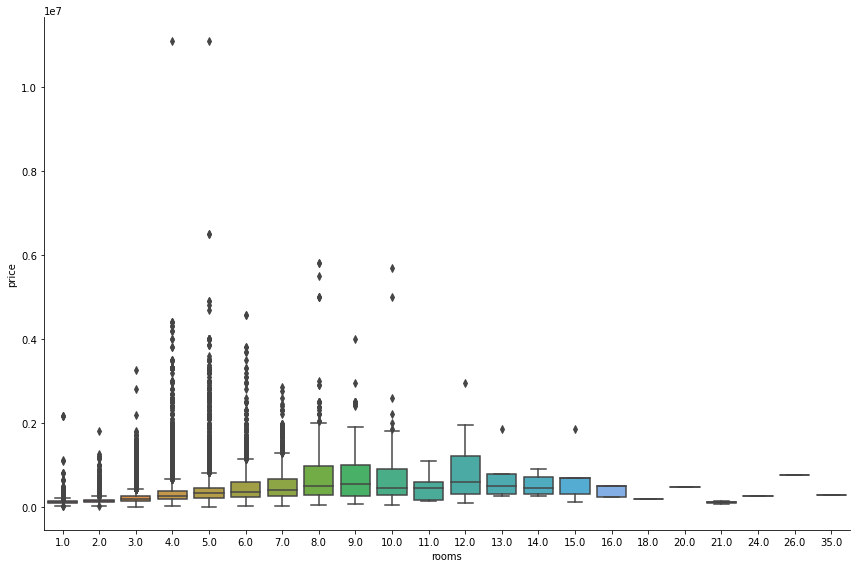

In [15]:
ax= sns.catplot(x="rooms", y="price", kind='box', data=data4, height=8, aspect=1.5)
plt.show()

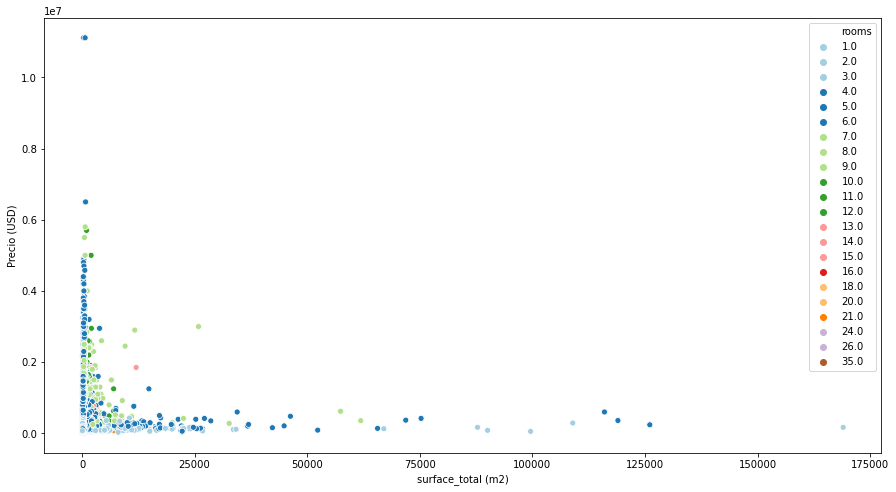

In [16]:
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.scatterplot(x="surface_total", y="price", hue='rooms', data=data4, palette='Paired', legend='full')
ax.set_xlabel('surface_total (m2)')
ax.set_ylabel('Precio (USD)')
plt.show()

In [17]:
data4.price.describe()

count    8.628100e+04
mean     2.517287e+05
std      2.703414e+05
min      6.000000e+03
25%      1.290000e+05
50%      1.840000e+05
75%      2.800000e+05
max      1.111111e+07
Name: price, dtype: float64

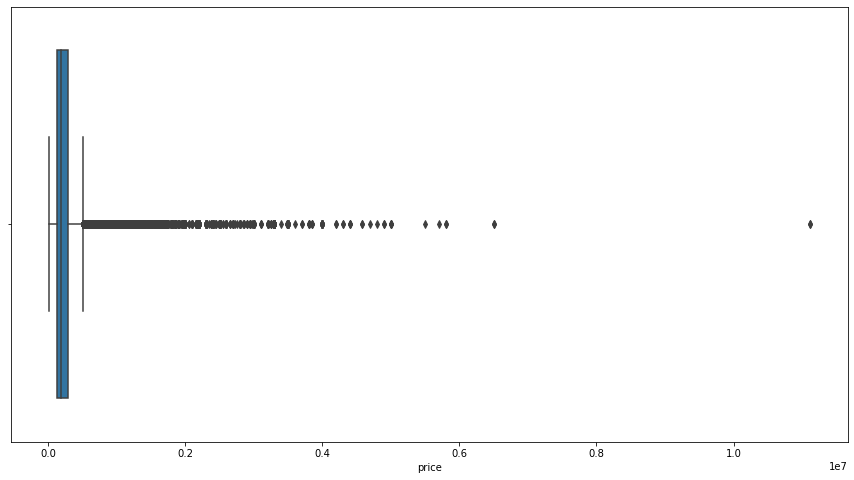

In [18]:
import seaborn as sns
plt.subplots(figsize=(15,8))
sns.boxplot(x=data4['price'])

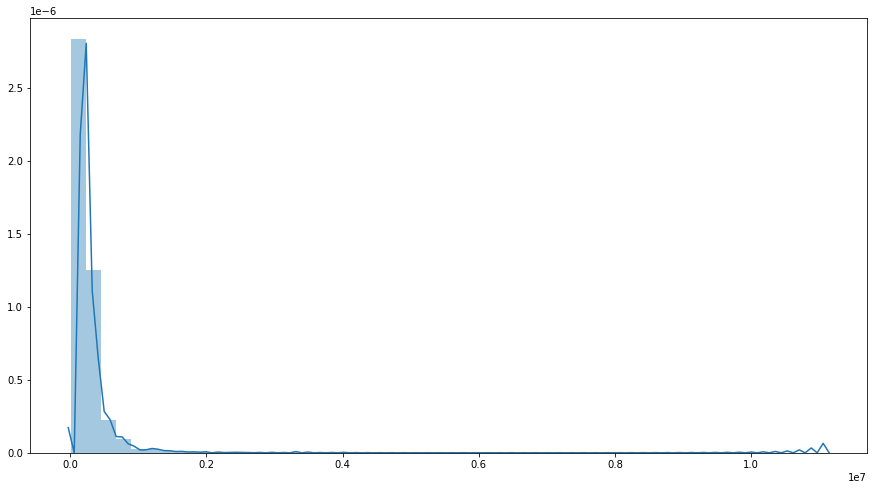

In [19]:
plt.subplots(figsize=(15,8))
sns.distplot(data4['price'].values)

<font color=blue>

Decido usar eliminación de outliers por el método de los 3 sigmas, debido a que encuentro un valor negativo al aplicar método de los percentiles.

In [20]:
valor_medio = data4['price'].mean()
std = data4['price'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers1 = np.logical_or(data4['price'] < minimo, data4['price'] > maximo)
print(valor_medio, std, minimo, maximo)

251728.71399265193 270341.3765529907 -559295.4156663202 1062752.8436516242


In [21]:
mascara_outliers1.value_counts()

False    84863
True      1418
Name: price, dtype: int64

In [22]:
data5 = data4[~mascara_outliers1]
data5['price'].describe()

count    8.486300e+04
mean     2.265096e+05
std      1.522578e+05
min      6.000000e+03
25%      1.280000e+05
50%      1.800000e+05
75%      2.750000e+05
max      1.062500e+06
Name: price, dtype: float64

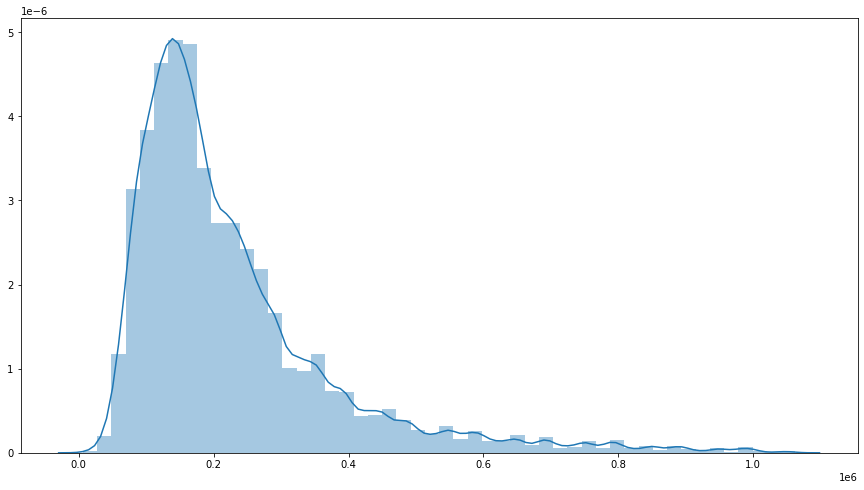

In [23]:
plt.subplots(figsize=(15,8))
sns.distplot(data5['price'].values)

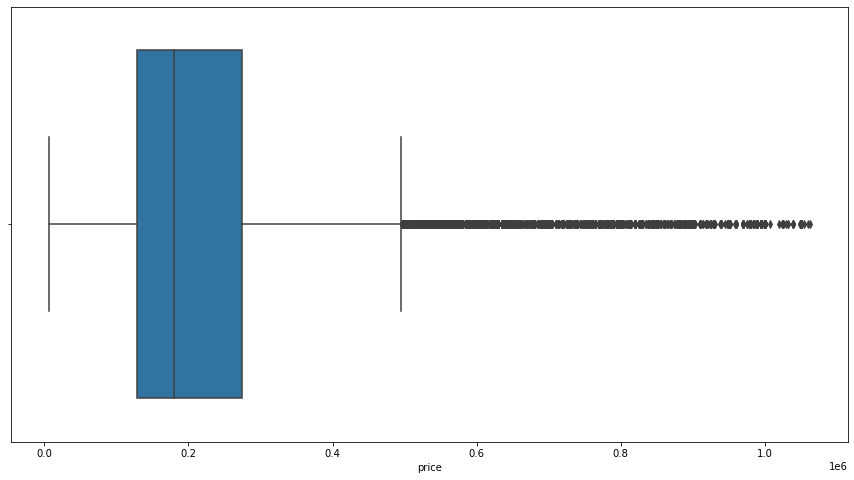

In [24]:
plt.subplots(figsize=(15,8))
sns.boxplot(x=data5['price'])

In [25]:
data4['price'].describe()

count    8.628100e+04
mean     2.517287e+05
std      2.703414e+05
min      6.000000e+03
25%      1.290000e+05
50%      1.840000e+05
75%      2.800000e+05
max      1.111111e+07
Name: price, dtype: float64

In [26]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84863 entries, 1 to 146657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l2               84863 non-null  object 
 1   l3               84863 non-null  object 
 2   rooms            84863 non-null  float64
 3   bedrooms         84863 non-null  float64
 4   bathrooms        84863 non-null  float64
 5   surface_total    84863 non-null  float64
 6   surface_covered  84863 non-null  float64
 7   price            84863 non-null  float64
 8   property_type    84863 non-null  object 
dtypes: float64(6), object(3)
memory usage: 6.5+ MB


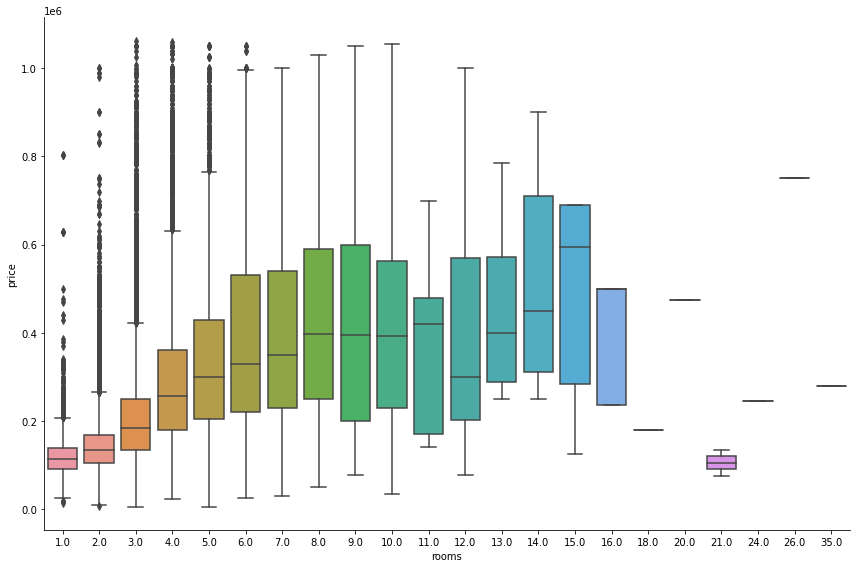

In [27]:
ax= sns.catplot(x="rooms", y="price", kind='box', data=data5, height=8, aspect=1.5)
plt.show()

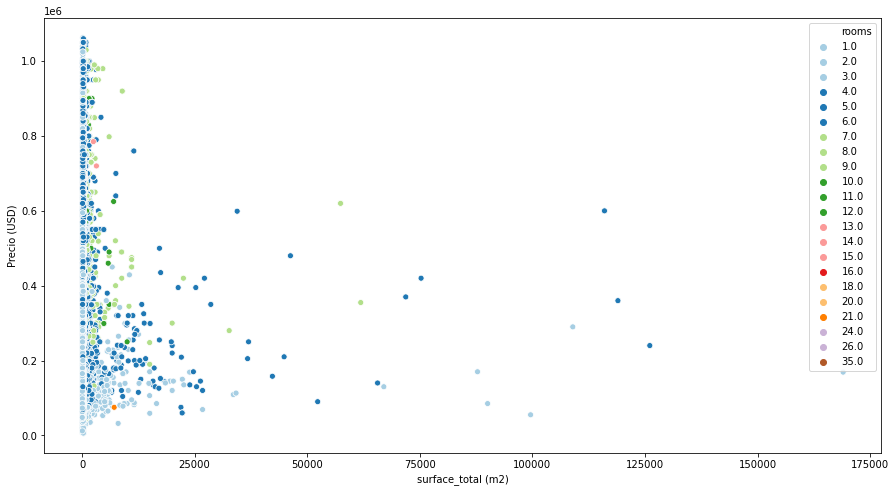

In [28]:
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.scatterplot(x="surface_total", y="price", hue='rooms', data=data5, palette='Paired', legend='full')
ax.set_xlabel('surface_total (m2)')
ax.set_ylabel('Precio (USD)')
plt.show()

In [29]:
data5.head()

l2                l3  rooms  bedrooms  bathrooms  \
1         Capital Federal             Boedo    2.0       1.0        2.0   
3         Capital Federal           Palermo    2.0       1.0        1.0   
4  Bs.As. G.B.A. Zona Sur          La Plata    2.0       1.0        1.0   
8         Capital Federal  Parque Patricios    1.0       1.0        1.0   
9         Capital Federal  Parque Patricios    1.0       1.0        1.0   

   surface_total  surface_covered     price property_type  
1           70.0             58.0  159000.0            PH  
3           85.0             50.0  295000.0            PH  
4           50.0             35.0   40000.0            PH  
8           45.0             37.0   89000.0            PH  
9           45.0             37.0   89000.0            PH

In [30]:
valor_medio = data5['surface_total'].mean()
std = data5['surface_total'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers1 = np.logical_or(data5['surface_total'] < minimo, data5['surface_total'] > maximo)
print(valor_medio, std, minimo, maximo)

208.5235025865218 1511.1018557713724 -4324.782064727595 4741.829069900639


In [31]:
mascara_outliers1.value_counts()

False    84604
True       259
Name: surface_total, dtype: int64

In [32]:
data5 = data5[~mascara_outliers1]
data5['surface_total'].describe()

count    84604.000000
mean       159.132866
std        257.506253
min         32.000000
25%         59.000000
50%         86.000000
75%        151.000000
max       4641.000000
Name: surface_total, dtype: float64

In [33]:
data5 = data5[data5.surface_covered < data5.surface_total]

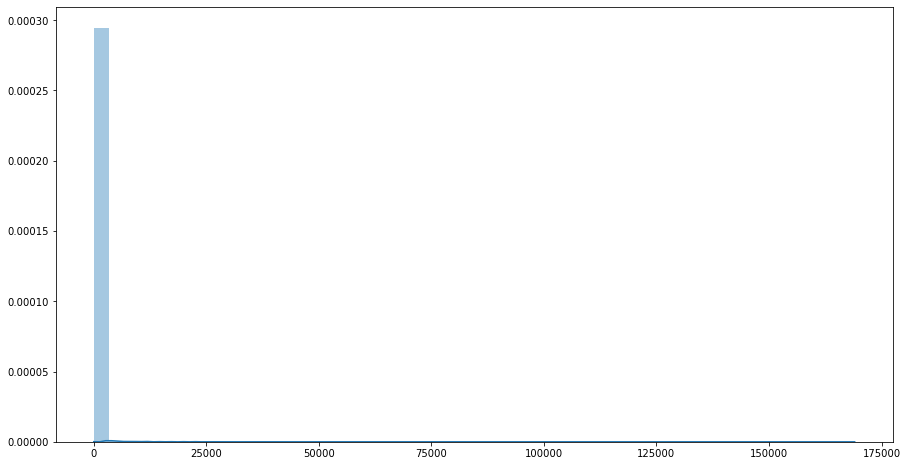

In [34]:
plt.subplots(figsize=(15,8))
sns.distplot(data4['surface_total'].values)

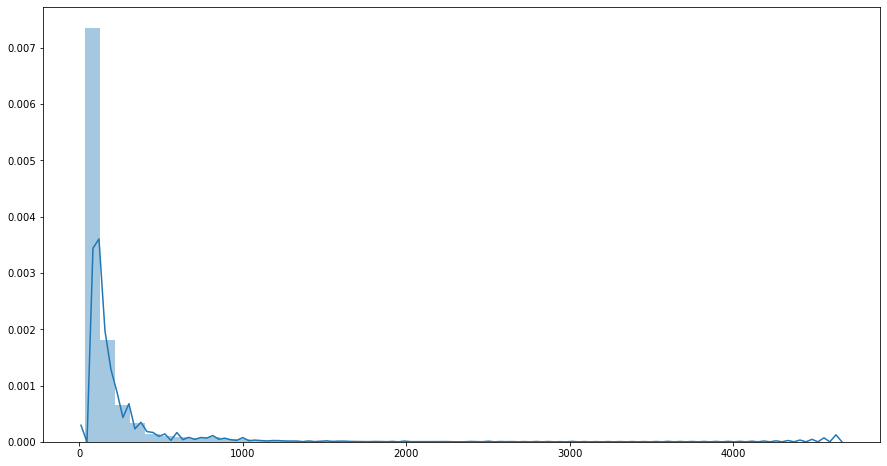

In [35]:
plt.subplots(figsize=(15,8))
sns.distplot(data5['surface_total'].values)

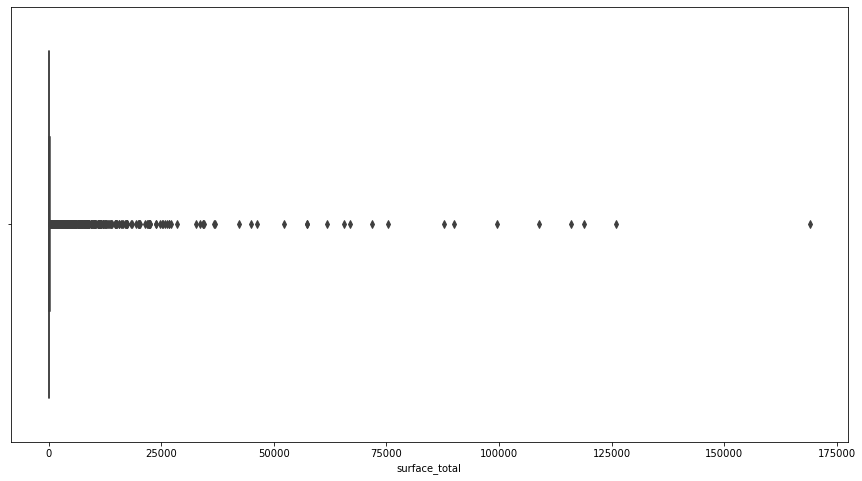

In [36]:
plt.subplots(figsize=(15,8))
sns.boxplot(x=data4['surface_total'])

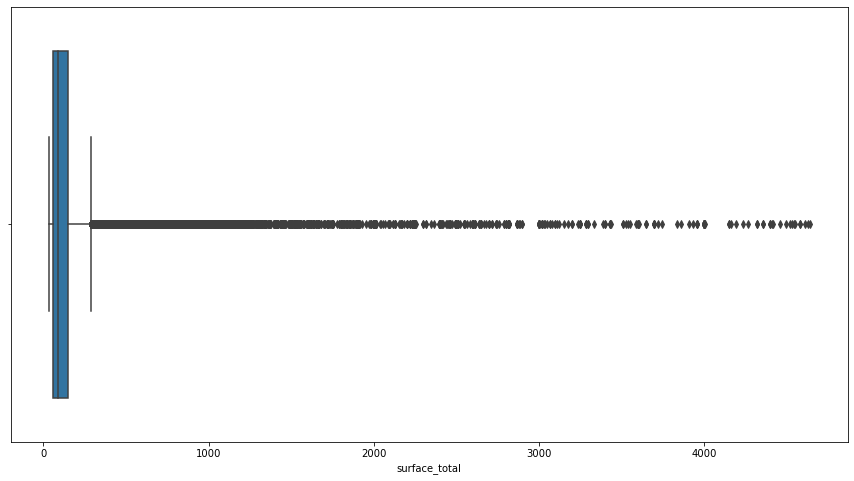

In [37]:
plt.subplots(figsize=(15,8))
sns.boxplot(x=data5['surface_total'])

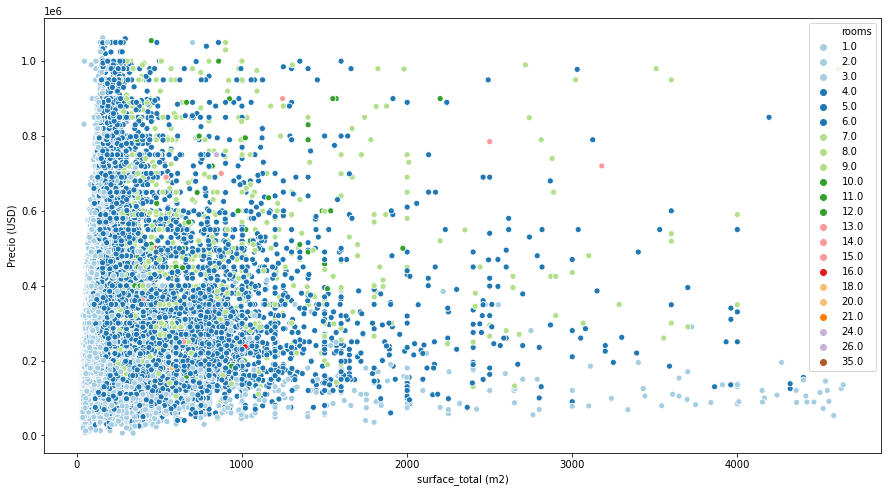

In [38]:
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.scatterplot(x="surface_total", y="price", hue='rooms', data=data5, palette='Paired', legend='full')
ax.set_xlabel('surface_total (m2)')
ax.set_ylabel('Precio (USD)')
plt.show()

In [39]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86281 entries, 1 to 146657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l2               86281 non-null  object 
 1   l3               86281 non-null  object 
 2   rooms            86281 non-null  float64
 3   bedrooms         86281 non-null  float64
 4   bathrooms        86281 non-null  float64
 5   surface_total    86281 non-null  float64
 6   surface_covered  86281 non-null  float64
 7   price            86281 non-null  float64
 8   property_type    86281 non-null  object 
dtypes: float64(6), object(3)
memory usage: 9.1+ MB


In [40]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84604 entries, 1 to 146657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l2               84604 non-null  object 
 1   l3               84604 non-null  object 
 2   rooms            84604 non-null  float64
 3   bedrooms         84604 non-null  float64
 4   bathrooms        84604 non-null  float64
 5   surface_total    84604 non-null  float64
 6   surface_covered  84604 non-null  float64
 7   price            84604 non-null  float64
 8   property_type    84604 non-null  object 
dtypes: float64(6), object(3)
memory usage: 6.5+ MB


In [41]:
valor_medio = data5['rooms'].mean()
std = data5['rooms'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers2 = np.logical_or(data5['rooms'] < minimo, data5['rooms'] > maximo)
print(valor_medio, std, minimo, maximo)

3.197082880242069 1.3075373017360248 -0.7255290249660056 7.119694785450143


In [42]:
mascara_outliers2.value_counts()

False    83932
True       672
Name: rooms, dtype: int64

In [43]:
data5 = data5[~mascara_outliers2]
data5['rooms'].describe()

count    83932.000000
mean         3.150133
std          1.185830
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: rooms, dtype: float64

In [44]:
valor_medio = data5['bedrooms'].mean()
std = data5['bedrooms'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers2 = np.logical_or(data5['bedrooms'] < minimo, data5['bedrooms'] > maximo)
print(valor_medio, std, minimo, maximo)

2.089620168708002 0.98342579552378 -0.8606572178633383 5.039897555279342


In [45]:
mascara_outliers2.value_counts()

False    83711
True       221
Name: bedrooms, dtype: int64

In [46]:
data5 = data5[~mascara_outliers2]
data5['bedrooms'].describe()

count    83711.000000
mean         2.078652
std          0.959596
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: bedrooms, dtype: float64

In [47]:
valor_medio = data5['bathrooms'].mean()
std = data5['bathrooms'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers2 = np.logical_or(data5['bathrooms'] < minimo, data5['bathrooms'] > maximo)
print(valor_medio, std, minimo, maximo)

1.594192131909982 0.7932232096932531 -0.7854774971697771 3.9738617609897413


In [48]:
mascara_outliers2.value_counts()

False    81410
True      2301
Name: bathrooms, dtype: int64

In [49]:
data5 = data5[~mascara_outliers2]
data5['bathrooms'].describe()

count    81410.000000
mean         1.520605
std          0.663191
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: bathrooms, dtype: float64

In [50]:
valor_medio = data5['price'].mean()
std = data5['price'].std()
minimo = valor_medio - 3*std
maximo = valor_medio + 3*std
mascara_outliers2 = np.logical_or(data5['price'] < minimo, data5['price'] > maximo)
print(valor_medio, std, minimo, maximo)

216027.5720795971 138516.5206023794 -199521.9897275411 631577.1338867353


In [51]:
mascara_outliers2.value_counts()

False    79591
True      1819
Name: price, dtype: int64

In [52]:
data5 = data5[~mascara_outliers2]
data5['surface_total'].describe()

count    79591.000000
mean       142.677564
std        224.260975
min         32.000000
25%         57.000000
50%         82.000000
75%        136.000000
max       4641.000000
Name: surface_total, dtype: float64

In [53]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79591 entries, 1 to 146657
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   l2               79591 non-null  object 
 1   l3               79591 non-null  object 
 2   rooms            79591 non-null  float64
 3   bedrooms         79591 non-null  float64
 4   bathrooms        79591 non-null  float64
 5   surface_total    79591 non-null  float64
 6   surface_covered  79591 non-null  float64
 7   price            79591 non-null  float64
 8   property_type    79591 non-null  object 
dtypes: float64(6), object(3)
memory usage: 6.1+ MB


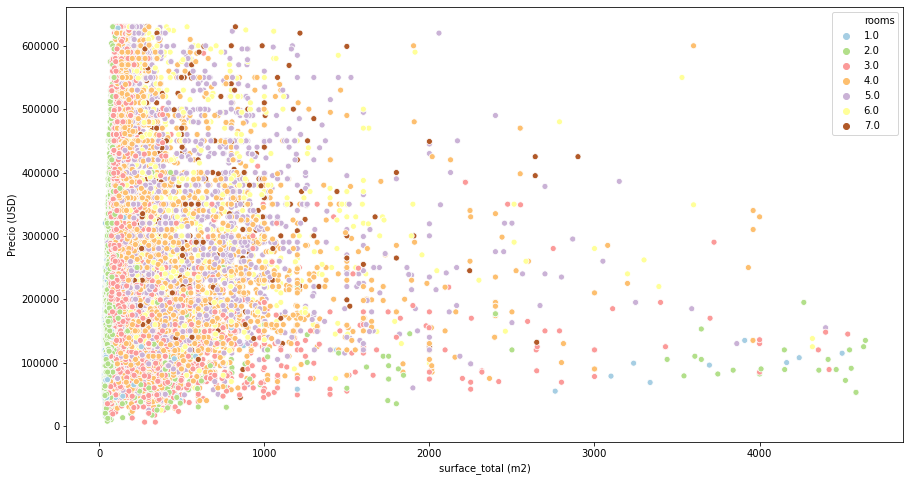

In [54]:
fig, ax = plt.subplots(figsize=(15,8))
ax= sns.scatterplot(x="surface_total", y="price", hue='rooms', data=data5, palette='Paired', legend='full')
ax.set_xlabel('surface_total (m2)')
ax.set_ylabel('Precio (USD)')
plt.show()

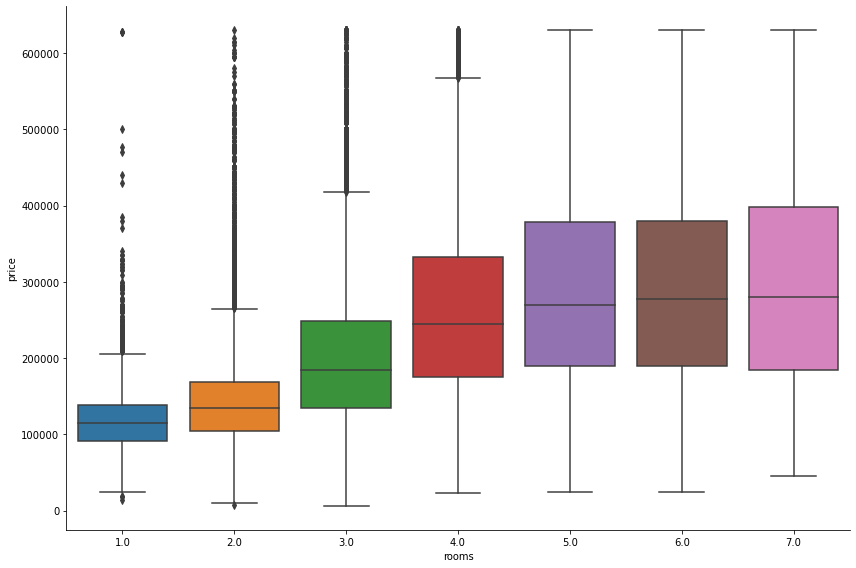

In [55]:
ax= sns.catplot(x="rooms", y="price", kind='box', data=data5, height=8, aspect=1.5)
plt.show()

In [56]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import random as sparse_random
from sklearn.random_projection import sparse_random_matrix

SVD = TruncatedSVD(n_components = 1)
data5['habitaciones'] = SVD.fit_transform(data5[['rooms', 'bedrooms','bathrooms']])
data5['superficie'] = SVD.fit_transform(data5[['surface_total', 'surface_covered']])

In [57]:
data5['habitaciones'] = (data5['habitaciones'] - data5['habitaciones'].mean())/data5['habitaciones']
data5['superficie'] = (data5['superficie'] - data5['superficie'].mean())/data5['superficie']

In [58]:
data5 = data5.drop(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered'], axis=1)

In [59]:
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79591 entries, 1 to 146657
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   l2             79591 non-null  object 
 1   l3             79591 non-null  object 
 2   price          79591 non-null  float64
 3   property_type  79591 non-null  object 
 4   habitaciones   79591 non-null  float64
 5   superficie     79591 non-null  float64
dtypes: float64(3), object(3)
memory usage: 6.8+ MB


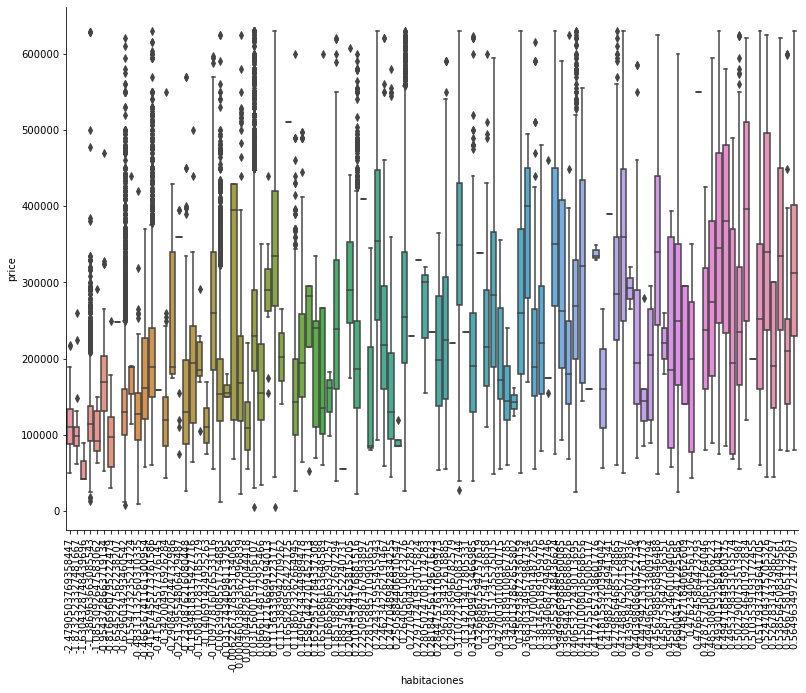

In [60]:
ax= sns.catplot(x='habitaciones', y="price", kind='box', data=data5, height=8, aspect=1.5)
plt.xticks(rotation = 90)
plt.show()

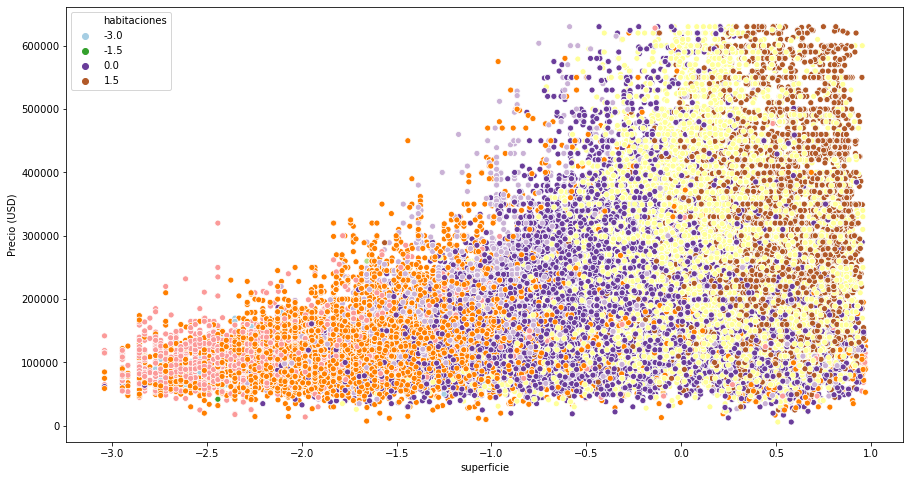

In [61]:
fig, ax = plt.subplots(figsize=(15,8))
#ax= sns.scatterplot(x='superficie', y="price", hue='habitaciones', data=data5, palette='Paired', legend='full')
ax= sns.scatterplot(x='superficie', y="price", hue='habitaciones', data=data5, palette='Paired')
ax.set_xlabel('superficie')
ax.set_ylabel('Precio (USD)')
plt.show()

### A.2 Encoding 

In [62]:
data5

l2                l3     price property_type  \
1                Capital Federal             Boedo  159000.0            PH   
3                Capital Federal           Palermo  295000.0            PH   
4         Bs.As. G.B.A. Zona Sur          La Plata   40000.0            PH   
8                Capital Federal  Parque Patricios   89000.0            PH   
9                Capital Federal  Parque Patricios   89000.0            PH   
...                          ...               ...       ...           ...   
146646  Bs.As. G.B.A. Zona Norte             Tigre  280000.0  Departamento   
146654  Bs.As. G.B.A. Zona Oeste   Tres de Febrero  200000.0  Departamento   
146655    Bs.As. G.B.A. Zona Sur       Berazategui  165000.0  Departamento   
146656  Bs.As. G.B.A. Zona Norte             Pilar  130000.0  Departamento   
146657  Bs.As. G.B.A. Zona Norte             Pilar   73000.0  Departamento   

        habitaciones  superficie  
1          -0.415675   -0.912531  
3          -0.629603   -0.677493  
4          -0.629603   -1.767995  
8          -1.386964   -1.979856  
9          -1.386964   -1.979856  
...              ...         ...  
146646      0.031560   -0.381905  
146654      0.031560    0.091914  
146655     -0.629603   -1.441773  
146656      0.264057    0.121182  
146657     -1.386964   -1.767995  

[79591 rows x 6 columns]

In [63]:
data5_dummy = pd.get_dummies(data5['l2'], prefix='l2') 
data5 = pd.concat([data5, data5_dummy], axis=1)  
del data5_dummy 

data5_dummy = pd.get_dummies(data5['l3'], prefix='l3') 
data5 = pd.concat([data5, data5_dummy], axis=1)  
del data5_dummy 

data5_dummy = pd.get_dummies(data5['property_type'], prefix='property_type') 
data5 = pd.concat([data5, data5_dummy], axis=1)  
del data5_dummy 

data5

l2                l3     price property_type  \
1                Capital Federal             Boedo  159000.0            PH   
3                Capital Federal           Palermo  295000.0            PH   
4         Bs.As. G.B.A. Zona Sur          La Plata   40000.0            PH   
8                Capital Federal  Parque Patricios   89000.0            PH   
9                Capital Federal  Parque Patricios   89000.0            PH   
...                          ...               ...       ...           ...   
146646  Bs.As. G.B.A. Zona Norte             Tigre  280000.0  Departamento   
146654  Bs.As. G.B.A. Zona Oeste   Tres de Febrero  200000.0  Departamento   
146655    Bs.As. G.B.A. Zona Sur       Berazategui  165000.0  Departamento   
146656  Bs.As. G.B.A. Zona Norte             Pilar  130000.0  Departamento   
146657  Bs.As. G.B.A. Zona Norte             Pilar   73000.0  Departamento   

        habitaciones  superficie  l2_Bs.As. G.B.A. Zona Norte  \
1          -0.415675   -0.912531                            0   
3          -0.629603   -0.677493                            0   
4          -0.629603   -1.767995                            0   
8          -1.386964   -1.979856                            0   
9          -1.386964   -1.979856                            0   
...              ...         ...                          ...   
146646      0.031560   -0.381905                            1   
146654      0.031560    0.091914                            0   
146655     -0.629603   -1.441773                            0   
146656      0.264057    0.121182                            1   
146657     -1.386964   -1.767995                            1   

        l2_Bs.As. G.B.A. Zona Oeste  l2_Bs.As. G.B.A. Zona Sur  \
1                                 0                          0   
3                                 0                          0   
4                                 0                          1   
8                                 0                          0   
9                                 0                          0   
...                             ...                        ...   
146646                            0                          0   
146654                            1                          0   
146655                            0                          1   
146656                            0                          0   
146657                            0                          0   

        l2_Capital Federal  ...  l3_Villa Riachuelo  l3_Villa Santa Rita  \
1                        1  ...                   0                    0   
3                        1  ...                   0                    0   
4                        0  ...                   0                    0   
8                        1  ...                   0                    0   
9                        1  ...                   0                    0   
...                    ...  ...                 ...                  ...   
146646                   0  ...                   0                    0   
146654                   0  ...                   0                    0   
146655                   0  ...                   0                    0   
146656                   0  ...                   0                    0   
146657                   0  ...                   0                    0   

        l3_Villa Soldati  l3_Villa Urquiza  l3_Villa del Parque  \
1                      0                 0                    0   
3                      0                 0                    0   
4                      0                 0                    0   
8                      0                 0                    0   
9                      0                 0                    0   
...                  ...               ...                  ...   
146646                 0                 0                    0   
146654                 0                 0                    0   
146

In [64]:
data6 = data5.drop(['l2','l3','property_type'], axis=1)

In [65]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79591 entries, 1 to 146657
Columns: 101 entries, price to property_type_PH
dtypes: float64(3), uint8(98)
memory usage: 12.4 MB


In [128]:
data6.head()

price  habitaciones  superficie  l2_Bs.As. G.B.A. Zona Norte  \
1  159000.0     -0.415675   -0.912531                            0   
3  295000.0     -0.629603   -0.677493                            0   
4   40000.0     -0.629603   -1.767995                            0   
8   89000.0     -1.386964   -1.979856                            0   
9   89000.0     -1.386964   -1.979856                            0   

   l2_Bs.As. G.B.A. Zona Oeste  l2_Bs.As. G.B.A. Zona Sur  l2_Capital Federal  \
1                            0                          0                   1   
3                            0                          0                   1   
4                            0                          1                   0   
8                            0                          0                   1   
9                            0                          0                   1   

   l3_Abasto  l3_Agronomía  l3_Almagro  ...  l3_Villa Riachuelo  \
1          0             0           0  ...                   0   
3          0             0           0  ...                   0   
4          0             0           0  ...                   0   
8          0             0           0  ...                   0   
9          0             0           0  ...                   0   

   l3_Villa Santa Rita  l3_Villa Soldati  l3_Villa Urquiza  \
1                    0                 0                 0   
3                    0                 0                 0   
4                    0                 0                 0   
8                    0                 0                 0   
9                    0                 0                 0   

   l3_Villa del Parque  property_type_Casa  property_type_Departamento  \
1                    0                   0                           0   
3                    0                   0                           0   
4                    0                   0                           0   
8                    0                   0                           0   
9                    0                   0                           0   

   property_type_Local comercial  property_type_Oficina  property_type_PH  
1                              0                      0                 1  
3                              0                      0                 1  
4                              0                      0                 1  
8                              0                      0                 1  
9                              0                      0                 1  

[5 rows x 101 columns]

### Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos

In [66]:
from sklearn.model_selection import train_test_split

X = data6.drop("price", axis=1)
y = data6.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(55713, 100) (55713,) (23878, 100) (23878,)


In [67]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
tree_regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_regressor.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=42, splitter='best')

In [68]:
lista_mse_train = []
lista_mse_test = []

a_profundidad = [3,5,7,10,15,20,30,50]

for a in a_profundidad:

    tree_regressor = DecisionTreeRegressor(max_depth=a, random_state=10)

    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    y_test_pred = tree_regressor.predict(X_test)

    mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
     
    lista_mse_train.append(mse_train)
    lista_mse_test.append(mse_test)

Text(0, 0.5, 'Error cuadrático medio')

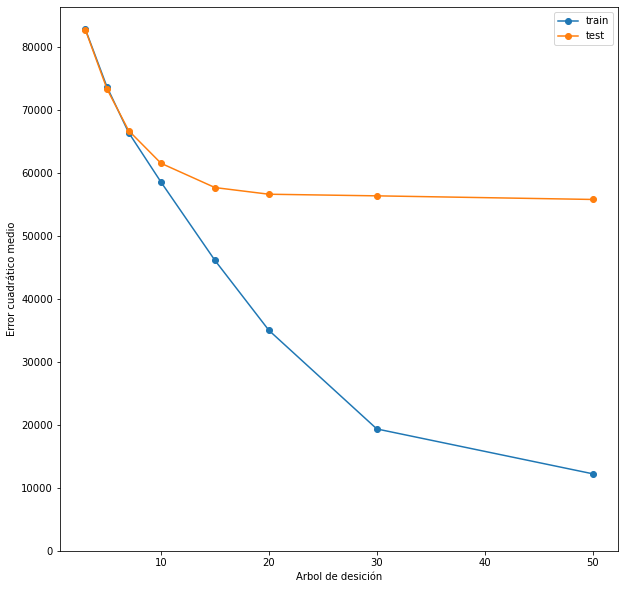

In [69]:
plt.figure(figsize = (10,10))
plt.plot(a_profundidad,lista_mse_train,'o-',label='train' )
plt.plot(a_profundidad,lista_mse_test,'o-',label='test')
plt.legend()
plt.ylim(ymin=0)
plt.xlabel('Arbol de desición')
plt.ylabel('Error cuadrático medio')

tree_regressor
Error cuadrático medio en Train: 35024.85520749594
Error cuadrático medio en Test: 56687.599353520396


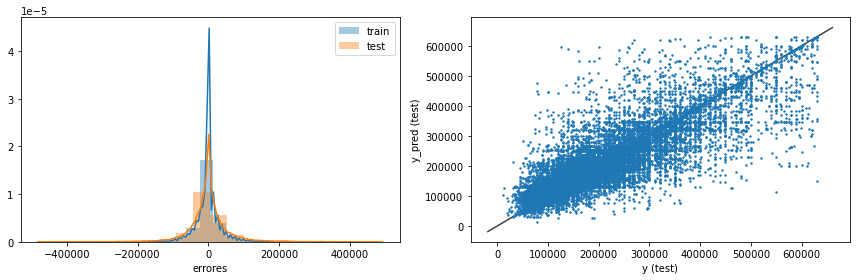

In [70]:
#Aplicando lo aprendido:

tree_regressor = DecisionTreeRegressor(max_depth=20, random_state=42)

tree_regressor.fit(X_train, y_train)

y_train_pred = tree_regressor.predict(X_train)
y_test_pred = tree_regressor.predict(X_test)
    
print('tree_regressor')

mse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
mse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f'Error cuadrático medio en Train: {mse_train}')
print(f'Error cuadrático medio en Test: {mse_test}')

mse_train_tree_regressor = mse_train
mse_test_tree_regressor = mse_test
    
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()

ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.savefig('Tree_Regressor_Profundidad_20.png')
plt.tight_layout()
plt.show()

<font color=blue>

En comparación con los resultados del modelo de Árbol de desición regresor final del proyecto 1 (Error cuadrático medio en Train: 47455.61, Error cuadrático medio en Test: 119904.72) podemos identificar una mejora del 26% y 53% respectivamente.

# Parte B: Modelos avanzados

Al menos un modelo debe ser optimizado por Grid Search o Random Search; el otro puede ser optimizado por búsqueda manual (es decir, puedes dejar los mejores parámetros que encontraste probando ).

### Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto.

In [71]:
from sklearn.metrics import classification_report, confusion_matrix 
!pip install xgboost
import xgboost as xgb 
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score, KFold

In [72]:
X = data6.drop("price", axis=1)
y = data6.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgbr = xgb.XGBRegressor()
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)


In [73]:
xgbr.fit(X_train, y_train)
 
score = xgbr.score(X_train, y_train)   
print("Training score: ", score) 

Training score:  0.8033131720498998


In [74]:
scores = cross_val_score(xgbr, X_train, y_train,cv=10)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 0.77


In [75]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.77


In [76]:
y_pred = xgbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: %.2f" % mse)

MSE: 2792102797.14


In [77]:
print("RMSE: %.2f" % (mse*(1/2.0)))

RMSE: 1396051398.57


XGBoost Regressor
Error cuadrático medio en Train: 48862.843184326586
Error cuadrático medio en Test: 52840.35197779172


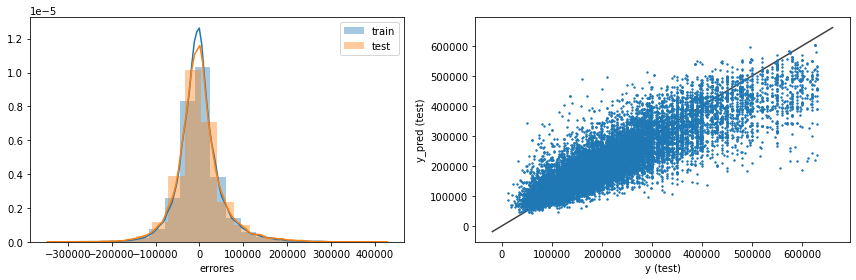

In [79]:
y_train_pred2 = xgbr.predict(X_train)
y_test_pred2 = xgbr.predict(X_test)
    
print('XGBoost Regressor')

mse_train2 = np.sqrt(mean_squared_error(y_train, y_train_pred2))
mse_test2 = np.sqrt(mean_squared_error(y_test, y_test_pred2))
print(f'Error cuadrático medio en Train: {mse_train2}')
print(f'Error cuadrático medio en Test: {mse_test2}')

mse_train_XGB_regressor1 = mse_train2
mse_test_XGB_regressor1 = mse_test2
    
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(y_train - y_train_pred2, bins = 20, label = 'train')
sns.distplot(y_test - y_test_pred2, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test,y_test_pred2, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.savefig('XGB_Regressor_1.png')
plt.tight_layout()
plt.show()

In [80]:
X = data6.drop("price", axis=1)
y = data6.price

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=42)

In [81]:
from sklearn.ensemble import RandomForestRegressor

RandomForest1 = RandomForestRegressor()

print(RandomForest1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [82]:
RandomForest1.fit(X_train3, y_train3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Random Forest Regressor
Error cuadrático medio en Train: 22454.436574078612
Error cuadrático medio en Test: 48391.781200242694


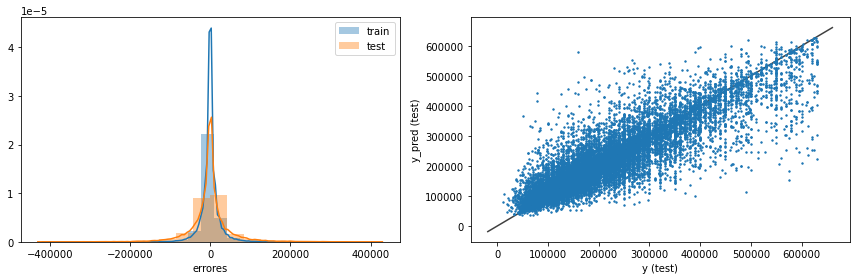

In [83]:
y_train_pred3 = RandomForest1.predict(X_train3)
y_test_pred3 = RandomForest1.predict(X_test3)
    
print('Random Forest Regressor')

mse_train3 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
mse_test3 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
print(f'Error cuadrático medio en Train: {mse_train3}')
print(f'Error cuadrático medio en Test: {mse_test3}')

mse_train_RandomForest_regressor1 = mse_train3
mse_test_RandomForest_regressor1 = mse_test3
    
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(y_train3 - y_train_pred3, bins = 20, label = 'train')
sns.distplot(y_test3 - y_test_pred3, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test3,y_test_pred3, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.savefig('RandomForest_Regressor_1.png')
plt.tight_layout()
plt.show()

### Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search. En la optimización de hiperparámetros, debes justificar los parámetros que elegiste para optimizar y el rango de cada uno

<font color=blue>

ATENCIÓN!!!

DES-COMENTAR EL GRIDSEARCH (últimas 3 líneas de código de la próxima celda) DEL XGBOOST CONSIDERANDO 4 HORAS DE PROCESAMIENTO con i5 y 8 GB RAM.

In [84]:
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate': [.03, 0.05, .07],
              'max_depth': np.arange(5, 20),
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgbr2_grid = GridSearchCV(xgbr, parameters, cv = 5, n_jobs = 5, verbose=True)

#ATENCIÓN!!!

#DESCOMENTAR LAS SIGUIENTES 3 LÍNEAS DE CODIGO CONSIDERANDO 4 HORAS DE PROCESAMIENTO

#xgbr2_grid.fit(X_train2, y_train2)

#print("Mejor resultado de r2", xgbr2_grid.best_score_)

#print("Mejores hiperparámetros del modelo" , xgbr2_grid.best_params_)


<font color=blue>

Aplicando los hiperparámetros obtenidos en el GridSearch del XGBoost

XGBoost Regressor
Error cuadrático medio en Train: 29288.89926959069
Error cuadrático medio en Test: 46303.300038592206


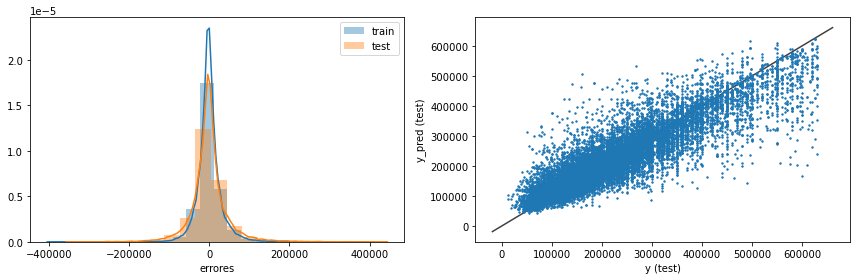

In [85]:
X = data6.drop("price", axis=1)
y = data6.price

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.3, random_state=42)

xgbr3 = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bytree = 0.7, learning_rate=0.03,
       max_depth=19, min_child_weight=4, n_estimators=500, random_state=42)

xgbr3.fit(X_train4, y_train4)
 
score3 = xgbr3.score(X_train4, y_train4)   

y_train_pred4 = xgbr3.predict(X_train4)
y_test_pred4 = xgbr3.predict(X_test4)
    
print('XGBoost Regressor')

mse_train4 = np.sqrt(mean_squared_error(y_train4, y_train_pred4))
mse_test4 = np.sqrt(mean_squared_error(y_test4, y_test_pred4))
print(f'Error cuadrático medio en Train: {mse_train4}')
print(f'Error cuadrático medio en Test: {mse_test4}')

mse_train_XGB_regressor2 = mse_train4
mse_test_XGB_regressor2 = mse_test4
    
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(y_train4 - y_train_pred4, bins = 20, label = 'train')
sns.distplot(y_test4 - y_test_pred4, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test4,y_test_pred4, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.savefig('XGB_Regressor_2.png')
plt.tight_layout()
plt.show()

<font color=blue>

ATENCIÓN!!!

DES-COMENTAR EL GRIDSEARCH  (últimas 3 líneas de código de la próxima celda) DEL RANDOM FOREST CONSIDERANDO 4 HORAS DE PROCESAMIENTO con i5 y 8 GB RAM.

In [86]:
RandomForest2 = RandomForestRegressor()

parameters2 = {'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

RandomForest2_grid = GridSearchCV(estimator = RandomForest2, param_grid = parameters2, cv = 5, n_jobs = 5, verbose=True)

#ATENCIÓN!!!

#DESCOMENTAR LAS SIGUIENTES 3 LÍNEAS DE CODIGO CONSIDERANDO 4 HORAS DE PROCESAMIENTO

#RandomForest2_grid.fit(X_train3, y_train3)

#print("Mejor resultado", RandomForest2_grid.best_score_)

#print("Mejores hiperparámetros del modelo" , RandomForest2_grid.best_params_)

<font color=blue>

Aplicando los hiperparámetros obtenidos en el GridSearch del Randon Forest

Random Forest Regressor Grid Search
Error cuadrático medio en Train: 50966.33760617359
Error cuadrático medio en Test: 55631.357709787706


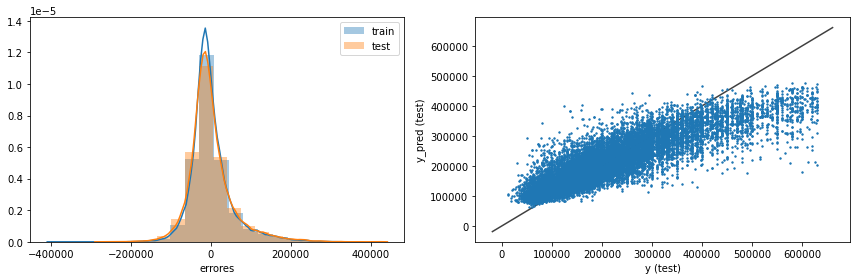

In [87]:
#Aplicando lo aprendido en el GridSearch de Random Forest

RandomForest3 = RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100)

RandomForest3.fit(X_train3, y_train3)

y_train_pred3 = RandomForest3.predict(X_train3)
y_test_pred3 = RandomForest3.predict(X_test3)
    
print('Random Forest Regressor Grid Search')

mse_train4 = np.sqrt(mean_squared_error(y_train3, y_train_pred3))
mse_test4 = np.sqrt(mean_squared_error(y_test3, y_test_pred3))
print(f'Error cuadrático medio en Train: {mse_train4}')
print(f'Error cuadrático medio en Test: {mse_test4}')

mse_train_RandomForest_regressor2 = mse_train4
mse_test_RandomForest_regressor2 = mse_test4
    
    
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.distplot(y_train3 - y_train_pred3, bins = 20, label = 'train')
sns.distplot(y_test3 - y_test_pred3, bins = 20, label = 'test')
plt.xlabel('errores')
plt.legend()


ax = plt.subplot(1,2,2)
ax.scatter(y_test3,y_test_pred3, s =2)
    
lims = [
np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]
    
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.xlabel('y (test)')
plt.ylabel('y_pred (test)')

plt.savefig('RandomForest_Regressor_3.png')
plt.tight_layout()
plt.show()

### Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica (Pendiente)

# Parte C: Interpretación de modelos

Debes responder al menos una pregunta. Obviamente, ¡cuanto más hagas, más aprenderás y mejor será tu proyecto!

<font color=blue>

### Crítica de la metodología utilizada (fallas, cambios qué se podrían hacer) y proponer mejoras a realizar


- Creo que son insuficientes las herramientas disponibles hasta ahora para obtener un modelo con suficiente accuracy para predecir el precio de una propiedad nueva. Recomiendo aplicar NLP para la descripción de las viviendas ya que allí es posible entender mas a plenitud sus características de valor. También series de tiempo para entender la variación del precio en el tiempo.

- Puedo aprender del problema que mientras más tiempo, esfuerzo y estratégia se dedique en la preparación de datos, el error se minimiza y puedo realizar entrenamientos más precisos mediante el estudio de mi propio modelo.







### ¿Qué variables fueron relevantes para el modelo para hacer una predicción? ¿Cuáles no?

### Si usaste un modelo de ensamble en árboles, además de ver la importancia de cada atributo, también elige algunos árboles al azar y observa qué atributos considera importantes

In [88]:
RandomForest3.feature_importances_

array([3.02304727e-01, 3.82093696e-01, 7.18452398e-03, 2.04346413e-02,
       1.57211365e-02, 2.17376775e-02, 1.16214350e-04, 7.56184325e-05,
       3.05577565e-03, 7.37762048e-04, 1.51072841e-03, 3.01295659e-03,
       2.00913789e-04, 5.16129969e-03, 2.26005820e-02, 1.32788164e-03,
       6.98576060e-04, 6.03241186e-04, 1.12392095e-03, 0.00000000e+00,
       1.52727435e-04, 2.14830199e-04, 2.24716805e-04, 3.01489561e-04,
       8.44365435e-04, 8.32597221e-04, 1.03756990e-03, 1.59650002e-03,
       4.37235281e-04, 3.80335665e-04, 4.26918321e-04, 1.51562234e-03,
       1.19855189e-03, 2.48369669e-04, 6.01636286e-03, 3.19078694e-04,
       5.65304092e-04, 1.64771088e-03, 3.14139953e-03, 4.40585398e-03,
       3.20767735e-03, 5.36181629e-03, 5.58154708e-04, 9.17160009e-04,
       1.36642458e-03, 2.55789258e-05, 9.38524407e-04, 1.03715181e-03,
       7.77313953e-04, 8.21605313e-04, 1.91939631e-03, 1.59237872e-03,
       2.60246687e-03, 1.24910172e-03, 2.13367803e-02, 4.07503079e-04,
      

In [89]:
Features_RandomForest3 = X_train3.head(0)
Features_RandomForest3

Empty DataFrame
Columns: [habitaciones, superficie, l2_Bs.As. G.B.A. Zona Norte, l2_Bs.As. G.B.A. Zona Oeste, l2_Bs.As. G.B.A. Zona Sur, l2_Capital Federal, l3_Abasto, l3_Agronomía, l3_Almagro, l3_Almirante Brown, l3_Avellaneda, l3_Balvanera, l3_Barracas, l3_Barrio Norte, l3_Belgrano, l3_Berazategui, l3_Boca, l3_Boedo, l3_Caballito, l3_Catalinas, l3_Cañuelas, l3_Centro / Microcentro, l3_Chacarita, l3_Coghlan, l3_Colegiales, l3_Congreso, l3_Constitución, l3_Escobar, l3_Esteban Echeverría, l3_Ezeiza, l3_Florencio Varela, l3_Flores, l3_Floresta, l3_General Rodríguez, l3_General San Martín, l3_Hurlingham, l3_Ituzaingó, l3_José C Paz, l3_La Matanza, l3_La Plata, l3_Lanús, l3_Las Cañitas, l3_Liniers, l3_Lomas de Zamora, l3_Malvinas Argentinas, l3_Marcos Paz, l3_Mataderos, l3_Merlo, l3_Monserrat, l3_Monte Castro, l3_Moreno, l3_Morón, l3_Nuñez, l3_Once, l3_Palermo, l3_Parque Avellaneda, l3_Parque Centenario, l3_Parque Chacabuco, l3_Parque Chas, l3_Parque Patricios, l3_Paternal, l3_Pilar, l3_Pompeya, l3_Presidente Perón, l3_Puerto Madero, l3_Quilmes, l3_Recoleta, l3_Retiro, l3_Saavedra, l3_San Cristobal, l3_San Fernando, l3_San Isidro, l3_San Miguel, l3_San Nicolás, l3_San Telmo, l3_San Vicente, l3_Tigre, l3_Tres de Febrero, l3_Tribunales, l3_Velez Sarsfield, l3_Versalles, l3_Vicente López, l3_Villa Crespo, l3_Villa Devoto, l3_Villa General Mitre, l3_Villa Lugano, l3_Villa Luro, l3_Villa Ortuzar, l3_Villa Pueyrredón, l3_Villa Real, l3_Villa Riachuelo, l3_Villa Santa Rita, l3_Villa Soldati, l3_Villa Urquiza, l3_Villa del Parque, property_type_Casa, property_type_Departamento, property_type_Local comercial, property_type_Oficina, property_type_PH]
Index: []

[0 rows x 100 columns]

In [90]:
data['l3'].unique()

array(['San Cristobal', 'Boedo', 'Palermo', 'La Plata', 'Villa Crespo',
       'Parque Patricios', 'Villa Pueyrredón', 'Pilar', 'Tigre', 'Abasto',
       'Flores', 'Morón', 'Nuñez', 'Almagro', 'Belgrano', 'Floresta',
       'Recoleta', 'Balvanera', 'Caballito', 'Chacarita', 'San Telmo',
       'Colegiales', 'La Matanza', 'San Isidro', 'San Miguel',
       'Villa Luro', 'Barrio Norte', 'Las Cañitas', 'San Nicolás',
       'Villa Urquiza', 'Vicente López', 'Parque Centenario',
       'General San Martín', 'Villa General Mitre', 'Lanús', 'Ituzaingó',
       'Boca', 'Once', 'Retiro', 'Monserrat', 'Avellaneda',
       'San Fernando', 'Puerto Madero', 'Villa Ortuzar',
       'Parque Chacabuco', 'Centro / Microcentro', 'Tres de Febrero',
       'Liniers', 'Coghlan', 'Congreso', 'Paternal', 'Saavedra',
       'Villa Santa Rita', 'Barracas', 'Villa Lugano', 'Constitución',
       'Mataderos', 'Villa Devoto', 'Parque Avellaneda',
       'Villa del Parque', 'Esteban Echeverría', 'Lomas de Zamora'

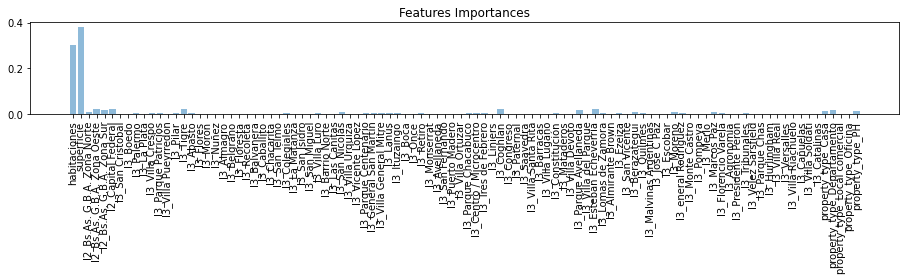

In [91]:
#Features_X3 = ('rooms','bedrooms','bathrooms','surface_total','surface_covered','l2_labeled','l3_labeled','property_type_labeled')
Features_X3 = ('habitaciones','superficie','l2_Bs.As. G.B.A. Zona Norte','l2_Bs.As. G.B.A. Zona Oeste',
               'l2_Bs.As. G.B.A. Zona Sur','l2_Capital Federal','l3_San Cristobal', 'l3_Boedo', 'l3_Palermo', 
               'l3_La Plata', 'l3_Villa Crespo','l3_Parque Patricios', 'l3_Villa Pueyrredón', 'l3_Pilar', 'l3_Tigre', 
               'l3_Abasto','l3_Flores', 'l3_Morón', 'l3_Nuñez', 'l3_Almagro', 'l3_Belgrano', 'l3_Floresta',
'l3_Recoleta', 'l3_Balvanera', 'l3_Caballito', 'l3_Chacarita', 'l3_San Telmo',
'l3_Colegiales', 'l3_La Matanza', 'l3_San Isidro', 'l3_San Miguel',
'l3_Villa Luro', 'l3_Barrio Norte', 'l3_Las Cañitas', 'l3_San Nicolás',
'l3_Villa Urquiza', 'l3_Vicente López', 'l3_Parque Centenario',
'l3_General San Martín', 'l3_Villa General Mitre', 'l3_Lanús', 'l3_Ituzaingó',
'l3_Boca', 'l3_Once', 'l3_Retiro', 'l3_Monserrat', 'l3_Avellaneda',
'l3_San Fernando', 'l3_Puerto Madero', 'l3_Villa Ortuzar',
'l3_Parque Chacabuco', 'l3_Centro / Microcentro', 'l3_Tres de Febrero',
'l3_Liniers', 'l3_Coghlan', 'l3_Congreso', 'l3_Paternal', 'l3_Saavedra',
'l3_Villa Santa Rita', 'l3_Barracas', 'l3_Villa Lugano', 'l3_Constitución',
'l3_Mataderos', 'l3_Villa Devoto', 'l3_Parque Avellaneda',
'l3_Villa del Parque', 'l3_Esteban Echeverría', 'l3_Lomas de Zamora',
'l3_Almirante Brown', 'l3_Ezeiza', 'l3_San Vicente', 'l3_Berazategui',
'l3_Quilmes', 'l3_Malvinas Argentinas', 'l3_José C Paz', 'l3_Escobar',
'l3_Moreno', 'l3_eneral Rodríguez', 'l3_Monte Castro', 'l3_Pompeya', 'l3_Merlo',
'l3_Marcos Paz', 'l3_Florencio Varela', 'l3_Agronomía', 'l3_Presidente Perón',
'l3_Tribunales', 'l3_Velez Sarsfield', 'l3_Parque Chas', 'l3_Hurlingham',
'l3_Villa Real', 'l3_Versalles', 'l3_Villa Riachuelo', 'l3_Cañuelas',
'l3_Villa Soldati', 'l3_Catalinas', 'property_type_Casa','property_type_Departamento',
    'property_type_Local comercial','property_type_Oficina','property_type_PH')


y_pos = np.arange(len(Features_X3))


Importance_X3 = RandomForest3.feature_importances_

plt.figure(figsize = (25,4))
plt.subplot(1,2,1)
plt.bar(y_pos, Importance_X3, align='center', alpha=0.5)
plt.xticks(y_pos, Features_X3)

plt.title('Features Importances')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


<font color=blue>

Las variables más relevantes para la predicción del modelo Random Forest ha sido "bathrooms" y "surface_covered".

Información del Árbol #0



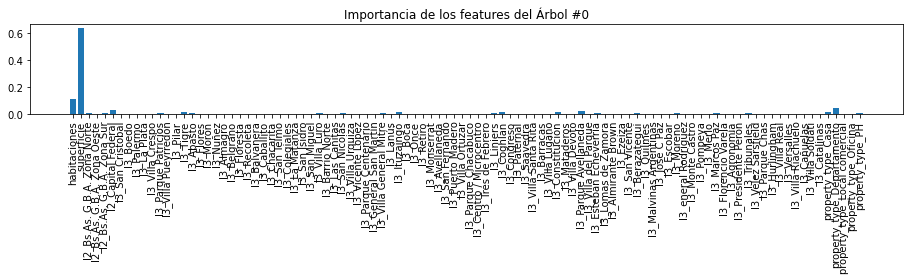

Información del Árbol #69



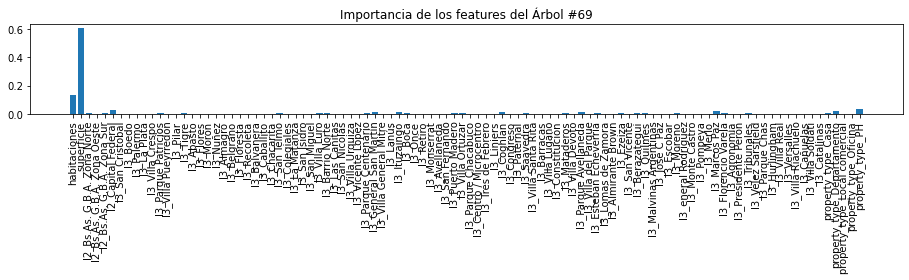

Información del Árbol #76



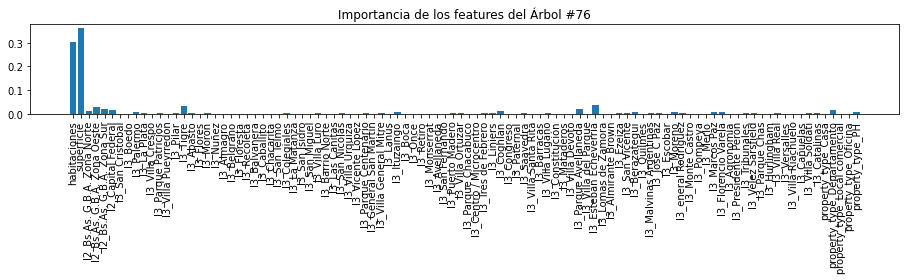

Información del Árbol #45



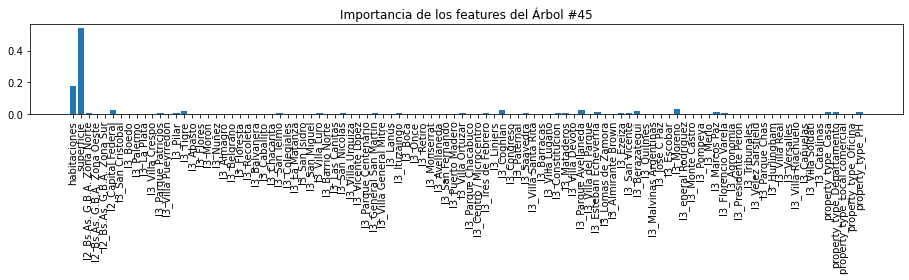

Información del Árbol #53



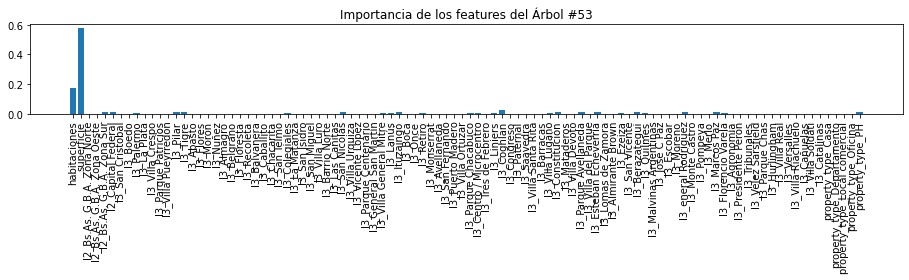

Información del Árbol #59



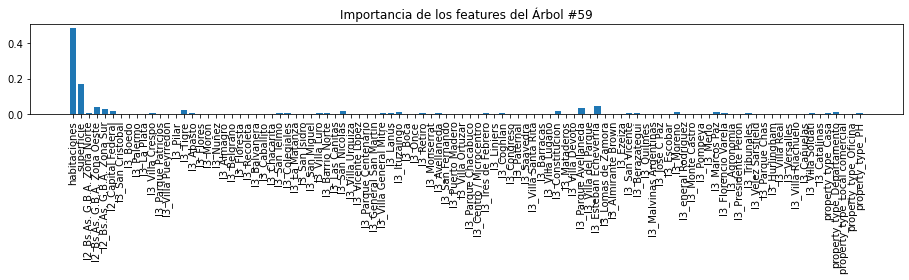

Información del Árbol #91



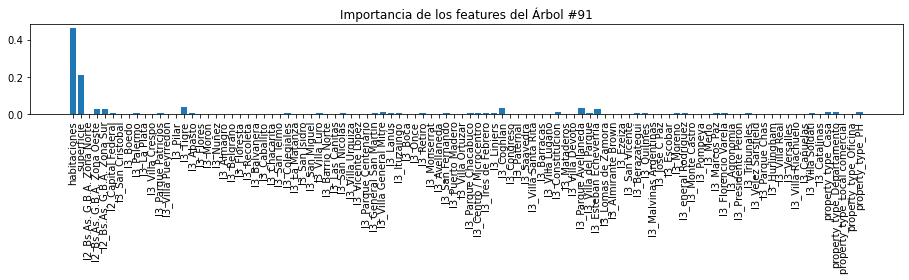

In [92]:
lista_arboles = []
Importances_X3 = []
#Features_X3 = ('rooms','bedrooms','bathrooms','surface_total','surface_covered','l2_labeled','l3_labeled','property_type_labeled')
Features_X3 = ('habitaciones','superficie','l2_Bs.As. G.B.A. Zona Norte','l2_Bs.As. G.B.A. Zona Oeste',
               'l2_Bs.As. G.B.A. Zona Sur','l2_Capital Federal','l3_San Cristobal', 'l3_Boedo', 'l3_Palermo', 
               'l3_La Plata', 'l3_Villa Crespo','l3_Parque Patricios', 'l3_Villa Pueyrredón', 'l3_Pilar', 'l3_Tigre', 
               'l3_Abasto','l3_Flores', 'l3_Morón', 'l3_Nuñez', 'l3_Almagro', 'l3_Belgrano', 'l3_Floresta',
'l3_Recoleta', 'l3_Balvanera', 'l3_Caballito', 'l3_Chacarita', 'l3_San Telmo',
'l3_Colegiales', 'l3_La Matanza', 'l3_San Isidro', 'l3_San Miguel',
'l3_Villa Luro', 'l3_Barrio Norte', 'l3_Las Cañitas', 'l3_San Nicolás',
'l3_Villa Urquiza', 'l3_Vicente López', 'l3_Parque Centenario',
'l3_General San Martín', 'l3_Villa General Mitre', 'l3_Lanús', 'l3_Ituzaingó',
'l3_Boca', 'l3_Once', 'l3_Retiro', 'l3_Monserrat', 'l3_Avellaneda',
'l3_San Fernando', 'l3_Puerto Madero', 'l3_Villa Ortuzar',
'l3_Parque Chacabuco', 'l3_Centro / Microcentro', 'l3_Tres de Febrero',
'l3_Liniers', 'l3_Coghlan', 'l3_Congreso', 'l3_Paternal', 'l3_Saavedra',
'l3_Villa Santa Rita', 'l3_Barracas', 'l3_Villa Lugano', 'l3_Constitución',
'l3_Mataderos', 'l3_Villa Devoto', 'l3_Parque Avellaneda',
'l3_Villa del Parque', 'l3_Esteban Echeverría', 'l3_Lomas de Zamora',
'l3_Almirante Brown', 'l3_Ezeiza', 'l3_San Vicente', 'l3_Berazategui',
'l3_Quilmes', 'l3_Malvinas Argentinas', 'l3_José C Paz', 'l3_Escobar',
'l3_Moreno', 'l3_eneral Rodríguez', 'l3_Monte Castro', 'l3_Pompeya', 'l3_Merlo',
'l3_Marcos Paz', 'l3_Florencio Varela', 'l3_Agronomía', 'l3_Presidente Perón',
'l3_Tribunales', 'l3_Velez Sarsfield', 'l3_Parque Chas', 'l3_Hurlingham',
'l3_Villa Real', 'l3_Versalles', 'l3_Villa Riachuelo', 'l3_Cañuelas',
'l3_Villa Soldati', 'l3_Catalinas', 'property_type_Casa','property_type_Departamento',
    'property_type_Local comercial','property_type_Oficina','property_type_PH')
j = 0
for i in np.arange(7):
    
    i = np.random.randint(100)
    lista_arboles.append(i)
    
for i in lista_arboles:
    print(f'Información del Árbol #{i}')
    print()
    while j < len(Features_X3):        
        Importances_X3.append(RandomForest3.estimators_[i].feature_importances_[j])
        j = j + 1    
        
    plt.figure(figsize = (25,4))
    plt.subplot(1,2,1)
    y_pos = np.arange(len(Features_X3))
    plt.bar(y_pos, Importances_X3)
    plt.xticks(y_pos, Features_X3)
    plt.title(f'Importancia de los features del Árbol #{i}')
    plt.xticks(rotation = 90)
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    plt.tight_layout()
    plt.show()
    j = 0
    Importances_X3 = []

### ¿En qué se diferencian esos árboles? ¿Por qué?

### Debes estudiar qué variables utiliza el modelo para predecir y responder la pregunta: ¿coincide con lo que esperabas a partir de tu experiencia con este dataset?

<font color=blue>

Los árboles se diferencian en que cada uno tiene como resultante distintas importancias en sus features a la hora de realizar la predicción, debido a la distinta varianza de la muestra.

### ¿Cómo es la distribución de errores (regresión) o qué clases se confunden entre sí (clasificación)? 

### ¿Dónde es mayor el error? ¿dónde acierta? 

### ¿Dónde falla? ¿A qué se debe?

### Debes ser crítico/a con la metodología utilizada. ¿Qué mejorarías?

<font color=blue>

Respecto a la distribución de errores en las predicciónes usando modelos de regresión, el error es mayor para valores del target precio mayores a los 600.000 USD. Esto puede explicarse por la naturaleza "skewed" de la distribución de la variable target, incluso después de ser despojada de outliers.

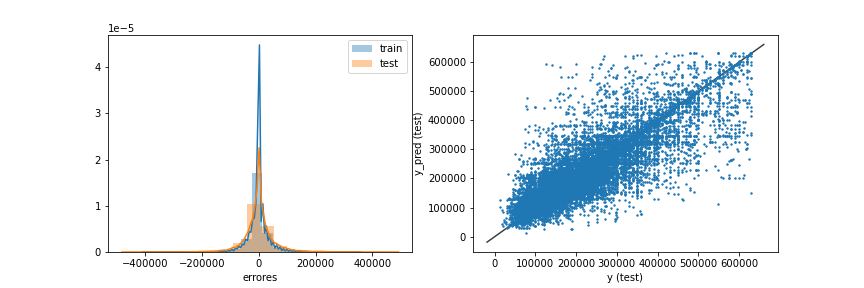

In [93]:
from IPython.display import Image
Image(filename='Tree_Regressor_Profundidad_20.png') 

In [94]:
print(f'Error cuadrático medio en Train: {np.around(mse_train_tree_regressor, decimals=2)}')
print(f'Error cuadrático medio en Test: {np.around(mse_test_tree_regressor, decimals=2)}')
print(f'El ratio de error train sobre test es: {np.around((mse_train_tree_regressor/mse_test_tree_regressor), decimals=2)}')

Error cuadrático medio en Train: 35024.86
Error cuadrático medio en Test: 56687.6
El ratio de error train sobre test es: 0.62


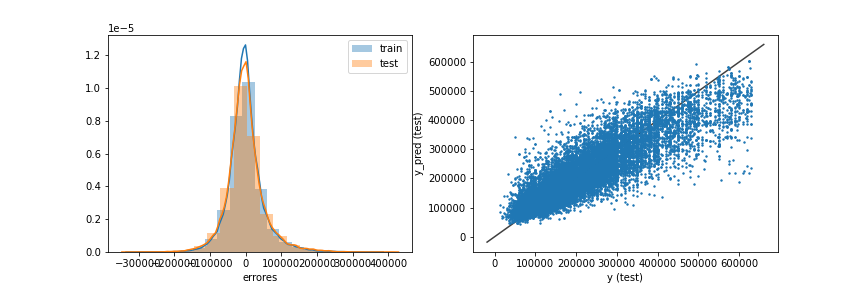

In [95]:
Image(filename='XGB_Regressor_1.png') 

In [96]:
print(f'Error cuadrático medio en Train: {np.around(mse_train_XGB_regressor1, decimals=2)}')
print(f'Error cuadrático medio en Test: {np.around(mse_test_XGB_regressor1, decimals=2)}')
print(f'El ratio de error train sobre test es: {np.around((mse_train_XGB_regressor1/mse_test_XGB_regressor1), decimals=2)}')

Error cuadrático medio en Train: 48862.84
Error cuadrático medio en Test: 52840.35
El ratio de error train sobre test es: 0.92


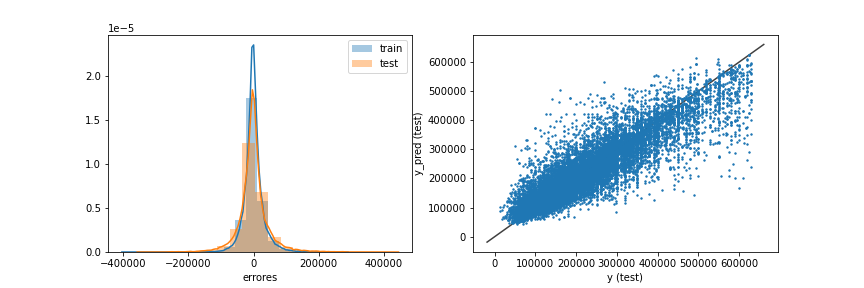

In [97]:
Image(filename='XGB_Regressor_2.png') 

In [98]:
print(f'Error cuadrático medio en Train: {np.around(mse_train_XGB_regressor2, decimals=2)}')
print(f'Error cuadrático medio en Test: {np.around(mse_test_XGB_regressor2, decimals=2)}')
print(f'El ratio de error train sobre test es: {np.around((mse_train_XGB_regressor2/mse_test_XGB_regressor2), decimals=2)}')

Error cuadrático medio en Train: 29288.9
Error cuadrático medio en Test: 46303.3
El ratio de error train sobre test es: 0.63


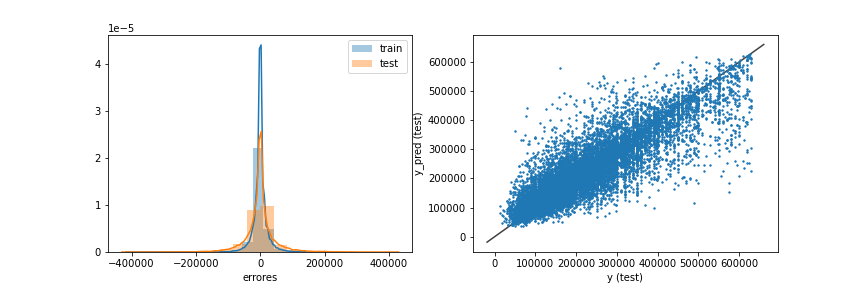

In [99]:
Image(filename='RandomForest_Regressor_1.png') 

In [100]:
print(f'Error cuadrático medio en Train: {np.around(mse_train_RandomForest_regressor1, decimals=2)}')
print(f'Error cuadrático medio en Test: {np.around(mse_test_RandomForest_regressor1, decimals=2)}')
print(f'El ratio de error train sobre test es: {np.around((mse_train_RandomForest_regressor1/mse_test_RandomForest_regressor1), decimals=2)}')

Error cuadrático medio en Train: 22454.44
Error cuadrático medio en Test: 48391.78
El ratio de error train sobre test es: 0.46


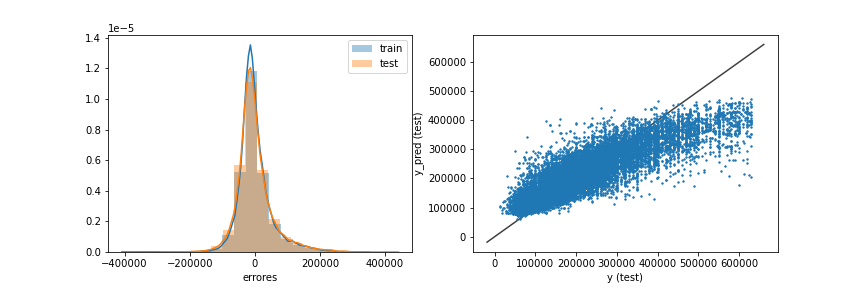

In [101]:
Image(filename='RandomForest_Regressor_3.png') 

In [102]:
print(f'Error cuadrático medio en Train: {np.around(mse_train_RandomForest_regressor2, decimals=2)}')
print(f'Error cuadrático medio en Test: {np.around(mse_test_RandomForest_regressor2, decimals=2)}')
print(f'El ratio de error train sobre test es: {np.around((mse_train_RandomForest_regressor2/mse_test_RandomForest_regressor2), decimals=2)}')

Error cuadrático medio en Train: 50966.34
Error cuadrático medio en Test: 55631.36
El ratio de error train sobre test es: 0.92


In [103]:
mse_train_tree_regressor.mean()/mse_test_tree_regressor.mean()

0.6178574433725924

In [104]:
errores = {
    'Modelos': ['ARBOL prof=20', 'XGB pred', 'XGB Op Grid', 'RANDOM FOREST pred', 'RANDOM FOREST Op Grid'],
    
    'MSE_TRAIN': [mse_train_tree_regressor.mean(), mse_train_XGB_regressor1.mean(), mse_train_XGB_regressor2.mean(),
                   mse_train_RandomForest_regressor1.mean(), mse_train_RandomForest_regressor2.mean()],
    
    'MSE_TEST': [mse_test_tree_regressor.mean(), mse_test_XGB_regressor1.mean(), mse_test_XGB_regressor2.mean(), 
                   mse_test_RandomForest_regressor1.mean(), mse_test_RandomForest_regressor2.mean()],
    
    'RATIO TRAIN vs TEST': [(mse_train_tree_regressor.mean()/mse_test_tree_regressor.mean()), (mse_train_XGB_regressor1.mean()/mse_test_XGB_regressor1.mean()), (mse_train_XGB_regressor2.mean()/mse_test_XGB_regressor2.mean()),
                   (mse_train_RandomForest_regressor1.mean()/mse_test_RandomForest_regressor1.mean()), (mse_train_RandomForest_regressor2.mean()/mse_test_RandomForest_regressor2.mean())]
}

tabla_errores = pd.DataFrame(errores, columns = ['Modelos', 'MSE_TRAIN', 'MSE_TEST','RATIO TRAIN vs TEST'])

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

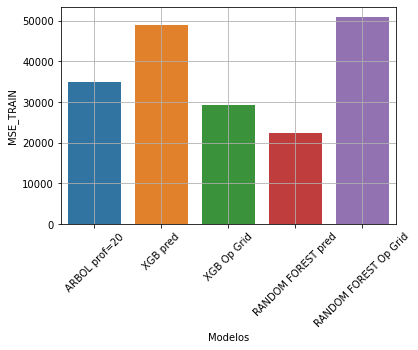

In [105]:
sns.barplot(x = 'Modelos', y = 'MSE_TRAIN', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

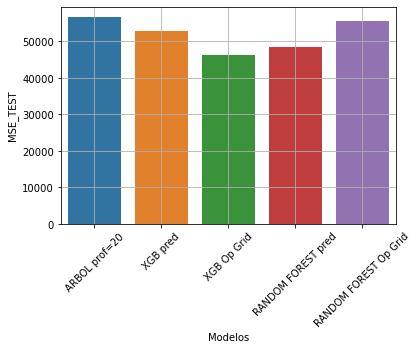

In [106]:
sns.barplot(x = 'Modelos', y = 'MSE_TEST', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

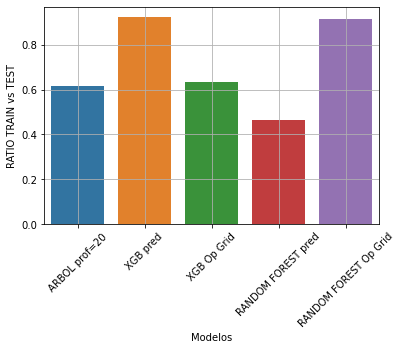

In [107]:
sns.barplot(x = 'Modelos', y = 'RATIO TRAIN vs TEST', data = tabla_errores)
plt.grid('y')
plt.xticks(rotation = 45)

<font color=blue>

Comparando los modelos entre sí en estilo benchmark, eligiría como el más óptimo el modelo XGBoost optimizado con Gridsearch, por contar con el menor error en Test y menor ratio entre errores Train vs Test.

# Desafío Opcional: Clustering

### Aplica una técnica de Clustering sobre el dataset. Puedes combinar con técnicas de reducción de dimensionalidad para facilitar la visualización

### ¿Qué clusters encuentras? ¿A qué pueden corresponder?

### ¿qué barrios se parecen más entre sí? 

### ¿qué tipos de propiedades se parecen más entre sí?

In [108]:
data5.columns.values

array(['l2', 'l3', 'price', 'property_type', 'habitaciones', 'superficie',
       'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste',
       'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal', 'l3_Abasto',
       'l3_Agronomía', 'l3_Almagro', 'l3_Almirante Brown',
       'l3_Avellaneda', 'l3_Balvanera', 'l3_Barracas', 'l3_Barrio Norte',
       'l3_Belgrano', 'l3_Berazategui', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Cañuelas',
       'l3_Centro / Microcentro', 'l3_Chacarita', 'l3_Coghlan',
       'l3_Colegiales', 'l3_Congreso', 'l3_Constitución', 'l3_Escobar',
       'l3_Esteban Echeverría', 'l3_Ezeiza', 'l3_Florencio Varela',
       'l3_Flores', 'l3_Floresta', 'l3_General Rodríguez',
       'l3_General San Martín', 'l3_Hurlingham', 'l3_Ituzaingó',
       'l3_José C Paz', 'l3_La Matanza', 'l3_La Plata', 'l3_Lanús',
       'l3_Las Cañitas', 'l3_Liniers', 'l3_Lomas de Zamora',
       'l3_Malvinas Argentinas', 'l3_Marcos Paz', 'l3_Mataderos',
       'l3_M

In [109]:
from sklearn.cluster import KMeans, DBSCAN

cluster2 = KMeans(n_clusters = 2)

#data_clusterl3_ =  data5[['l3_labeled', 'price', 'surface_total']]

data_clusterl3_ =  data5[['l2', 'l3', 'price', 'property_type', 'habitaciones', 'superficie',
       'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste',
       'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal', 'l3_Abasto',
       'l3_Agronomía', 'l3_Almagro', 'l3_Almirante Brown',
       'l3_Avellaneda', 'l3_Balvanera', 'l3_Barracas', 'l3_Barrio Norte',
       'l3_Belgrano', 'l3_Berazategui', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Cañuelas',
       'l3_Centro / Microcentro', 'l3_Chacarita', 'l3_Coghlan',
       'l3_Colegiales', 'l3_Congreso', 'l3_Constitución', 'l3_Escobar',
       'l3_Esteban Echeverría', 'l3_Ezeiza', 'l3_Florencio Varela',
       'l3_Flores', 'l3_Floresta', 'l3_General Rodríguez',
       'l3_General San Martín', 'l3_Hurlingham', 'l3_Ituzaingó',
       'l3_José C Paz', 'l3_La Matanza', 'l3_La Plata', 'l3_Lanús',
       'l3_Las Cañitas', 'l3_Liniers', 'l3_Lomas de Zamora',
       'l3_Malvinas Argentinas', 'l3_Marcos Paz', 'l3_Mataderos',
       'l3_Merlo', 'l3_Monserrat', 'l3_Monte Castro', 'l3_Moreno',
       'l3_Morón', 'l3_Nuñez', 'l3_Once', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Centenario',
       'l3_Parque Chacabuco', 'l3_Parque Chas', 'l3_Parque Patricios',
       'l3_Paternal', 'l3_Pilar', 'l3_Pompeya', 'l3_Presidente Perón',
       'l3_Puerto Madero', 'l3_Quilmes', 'l3_Recoleta', 'l3_Retiro',
       'l3_Saavedra', 'l3_San Cristobal', 'l3_San Fernando',
       'l3_San Isidro', 'l3_San Miguel', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_San Vicente', 'l3_Tigre', 'l3_Tres de Febrero',
       'l3_Tribunales', 'l3_Velez Sarsfield', 'l3_Versalles',
       'l3_Vicente López', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Villa Luro',
       'l3_Villa Ortuzar', 'l3_Villa Pueyrredón', 'l3_Villa Real',
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       'l3_Villa Urquiza', 'l3_Villa del Parque', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Oficina', 'property_type_PH']]

In [110]:
data_clusterl3_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79591 entries, 1 to 146657
Columns: 104 entries, l2 to property_type_PH
dtypes: float64(3), object(3), uint8(98)
memory usage: 14.2+ MB


In [111]:
data5['l3'].value_counts()

Palermo            7569
Tigre              6064
Almagro            4557
Villa Crespo       3988
Belgrano           3702
                   ... 
Villa Soldati        45
Cañuelas             42
Villa Riachuelo      28
Marcos Paz           17
Catalinas             1
Name: l3, Length: 89, dtype: int64

In [112]:
data5['l3_Puerto Madero'].value_counts()

0    79191
1      400
Name: l3_Puerto Madero, dtype: int64

In [113]:
data5['l3_Mataderos'].value_counts()

0    79188
1      403
Name: l3_Mataderos, dtype: int64

In [114]:
data5['l3_Palermo'].value_counts()

0    72022
1     7569
Name: l3_Palermo, dtype: int64

In [115]:
data5['l3_Tigre'].value_counts()

0    73527
1     6064
Name: l3_Tigre, dtype: int64

In [116]:
#data5['l3_labeled'].value_counts()

In [117]:
data_clusterl3_[data_clusterl3_['l3_Puerto Madero'] == 1]

l2             l3     price property_type  habitaciones  \
373     Capital Federal  Puerto Madero  280000.0  Departamento     -0.629603   
1360    Capital Federal  Puerto Madero  380000.0  Departamento     -0.629603   
2349    Capital Federal  Puerto Madero  490000.0  Departamento     -0.415675   
2350    Capital Federal  Puerto Madero  500000.0  Departamento     -0.629603   
2661    Capital Federal  Puerto Madero  450000.0  Departamento      0.031560   
...                 ...            ...       ...           ...           ...   
140605  Capital Federal  Puerto Madero  547999.0  Departamento      0.031560   
140606  Capital Federal  Puerto Madero  548000.0  Departamento      0.031560   
140957  Capital Federal  Puerto Madero  240000.0  Departamento      0.356294   
145286  Capital Federal  Puerto Madero  545000.0  Departamento      0.031560   
145440  Capital Federal  Puerto Madero  370000.0  Departamento     -0.629603   

        superficie  l2_Bs.As. G.B.A. Zona Norte  l2_Bs.As. G.B.A. Zona Oeste  \
373      -1.629801                            0                            0   
1360     -0.563007                            0                            0   
2349     -0.448944                            0                            0   
2350     -0.529789                            0                            0   
2661     -0.481547                            0                            0   
...            ...                          ...                          ...   
140605   -0.160296                            0                            0   
140606   -0.160296                            0                            0   
140957    0.048915                            0                            0   
145286   -0.420353                            0                            0   
145440   -0.577046                            0                            0   

        l2_Bs.As. G.B.A. Zona Sur  l2_Capital Federal  ...  \
373                             0                   1  ...   
1360                            0                   1  ...   
2349                            0                   1  ...   
2350                            0                   1  ...   
2661                            0                   1  ...   
...                           ...                 ...  ...   
140605                          0                   1  ...   
140606                          0                   1  ...   
140957                          0                   1  ...   
145286                          0                   1  ...   
145440                          0                   1  ...   

        l3_Villa Riachuelo  l3_Villa Santa Rita  l3_Villa Soldati  \
373                      0                    0                 0   
1360                     0                    0                 0   
2349                     0                    0                 0   
2350                     0                    0                 0   
2661                     0                    0                 0   
...                    ...                  ...               ...   
140605                   0                    0                 0   
140606                   0                    0                 0   
140957                   0                    0                 0   
145286                   0                    0                 0   
145440                   0                    0                 0   

        l3_Villa Urquiza  l3_Villa del Parque  property_type_Casa  \
373                    0                    0                   0   
1360                   0                    0                   0   
2349                   0                    0                   0   
2350                   0                    0                   0   
2661                   0                    0                   0   
...                  ...                  ...                 ...   
140605                 0                  

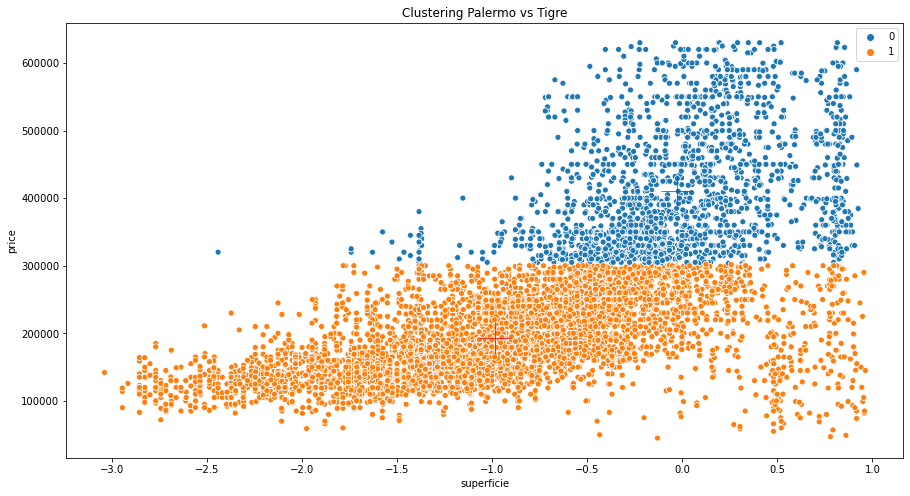

In [118]:
data_clusterl3_1 = data_clusterl3_[data_clusterl3_['l3_Palermo'] == 1]
data_clusterl3_2 = data_clusterl3_[data_clusterl3_['l3_Tigre'] == 1]
data_clusterl3_1 = data_clusterl3_1.append(data_clusterl3_2)

#data_clusterl3_1 = data_clusterl3_[data_clusterl3_.l3_labeled == 48]
#data_clusterl3_2 = data_clusterl3_[data_clusterl3_.l3_labeled == 70]
#data_clusterl3_1 = data_clusterl3_1.append(data_clusterl3_2)

data_clusterl3_1['l3_Palermo'] = data_clusterl3_1['l3_Palermo'].replace(to_replace = 1, value = 1)

cluster2.fit(data_clusterl3_1[['superficie','price']])

labels2 = cluster2.labels_
center2 = cluster2.cluster_centers_

plt.subplots(figsize=(15,8))
sns.scatterplot(x = data_clusterl3_1['superficie'], y = data_clusterl3_1['price'], hue = labels2)
sns.scatterplot(x = center2[:, 0], y = center2[:, 1], color = 'red', marker = '+', s = 1000)
plt.title('Clustering Palermo vs Tigre')
plt.show()

In [119]:
data5[data5['l3'] == "Puerto Madero"].describe()

price  habitaciones  superficie  l2_Bs.As. G.B.A. Zona Norte  \
count     400.000000    400.000000  400.000000                        400.0   
mean   410770.777500     -0.361432   -0.765896                          0.0   
std    105241.110664      0.309785    0.438463                          0.0   
min      6000.000000     -1.386964   -2.537080                          0.0   
25%    330000.000000     -0.629603   -0.972872                          0.0   
50%    402503.500000     -0.415675   -0.837040                          0.0   
75%    476700.000000     -0.063991   -0.447633                          0.0   
max    630000.000000      0.356294    0.509613                          0.0   

       l2_Bs.As. G.B.A. Zona Oeste  l2_Bs.As. G.B.A. Zona Sur  \
count                        400.0                      400.0   
mean                           0.0                        0.0   
std                            0.0                        0.0   
min                            0.0                        0.0   
25%                            0.0                        0.0   
50%                            0.0                        0.0   
75%                            0.0                        0.0   
max                            0.0                        0.0   

       l2_Capital Federal  l3_Abasto  l3_Agronomía  l3_Almagro  ...  \
count               400.0      400.0         400.0       400.0  ...   
mean                  1.0        0.0           0.0         0.0  ...   
std                   0.0        0.0           0.0         0.0  ...   
min                   1.0        0.0           0.0         0.0  ...   
25%                   1.0        0.0           0.0         0.0  ...   
50%                   1.0        0.0           0.0         0.0  ...   
75%                   1.0        0.0           0.0         0.0  ...   
max                   1.0        0.0           0.0         0.0  ...   

       l3_Villa Riachuelo  l3_Villa Santa Rita  l3_Villa Soldati  \
count               400.0                400.0             400.0   
mean                  0.0                  0.0               0.0   
std                   0.0                  0.0               0.0   
min                   0.0                  0.0               0.0   
25%                   0.0                  0.0               0.0   
50%                   0.0                  0.0               0.0   
75%                   0.0                  0.0               0.0   
max                   0.0                  0.0               0.0   

       l3_Villa Urquiza  l3_Villa del Parque  property_type_Casa  \
count             400.0                400.0               400.0   
mean                0.0                  0.0                 0.0   
std                 0.0                  0.0                 0.0   
min                 0.0                  0.0                 0.0   
25%                 0.0                  0.0                 0.0   
50%                 0.0                  0.0                 0.0   
75%                 0.0                  0.0                 0.0   
max                 0.0                  0.0                 0.0   

       property_type_Departamento  property_type_Local comercial  \
count                       400.0                          400.0   
mean                          1.0                            0.0   
std                           0.0                            0.0   
min                           1.0                            0.0   
25%                           1.0                            0.0   
50%                           1.0                            0.0   
75%                           1.0                            0.0   
max                           1.0                            0.0   

       property_type_Oficina  property_type_PH  
count                  400.0             400.0  
mean                     0.0               0.0  
std                      0.0               0.0  
min                      0.0              

In [120]:
data5[data5['l3'] == "Mataderos"].describe()

price  habitaciones  superficie  l2_Bs.As. G.B.A. Zona Norte  \
count     403.000000    403.000000  403.000000                        403.0   
mean   173876.578164     -0.108559   -0.553507                          0.0   
std     83612.451597      0.490871    0.776941                          0.0   
min     48900.000000     -2.479050   -2.585230                          0.0   
25%    119900.000000     -0.063991   -0.947143                          0.0   
50%    159000.000000      0.031560   -0.442454                          0.0   
75%    205000.000000      0.210154    0.093146                          0.0   
max    620000.000000      0.546676    0.753782                          0.0   

       l2_Bs.As. G.B.A. Zona Oeste  l2_Bs.As. G.B.A. Zona Sur  \
count                        403.0                      403.0   
mean                           0.0                        0.0   
std                            0.0                        0.0   
min                            0.0                        0.0   
25%                            0.0                        0.0   
50%                            0.0                        0.0   
75%                            0.0                        0.0   
max                            0.0                        0.0   

       l2_Capital Federal  l3_Abasto  l3_Agronomía  l3_Almagro  ...  \
count               403.0      403.0         403.0       403.0  ...   
mean                  1.0        0.0           0.0         0.0  ...   
std                   0.0        0.0           0.0         0.0  ...   
min                   1.0        0.0           0.0         0.0  ...   
25%                   1.0        0.0           0.0         0.0  ...   
50%                   1.0        0.0           0.0         0.0  ...   
75%                   1.0        0.0           0.0         0.0  ...   
max                   1.0        0.0           0.0         0.0  ...   

       l3_Villa Riachuelo  l3_Villa Santa Rita  l3_Villa Soldati  \
count               403.0                403.0             403.0   
mean                  0.0                  0.0               0.0   
std                   0.0                  0.0               0.0   
min                   0.0                  0.0               0.0   
25%                   0.0                  0.0               0.0   
50%                   0.0                  0.0               0.0   
75%                   0.0                  0.0               0.0   
max                   0.0                  0.0               0.0   

       l3_Villa Urquiza  l3_Villa del Parque  property_type_Casa  \
count             403.0                403.0          403.000000   
mean                0.0                  0.0            0.141439   
std                 0.0                  0.0            0.348907   
min                 0.0                  0.0            0.000000   
25%                 0.0                  0.0            0.000000   
50%                 0.0                  0.0            0.000000   
75%                 0.0                  0.0            0.000000   
max                 0.0                  0.0            1.000000   

       property_type_Departamento  property_type_Local comercial  \
count                  403.000000                          403.0   
mean                     0.459057                            0.0   
std                      0.498940                            0.0   
min                      0.000000                            0.0   
25%                      0.000000                            0.0   
50%                      0.000000                            0.0   
75%                      1.000000                            0.0   
max                      1.000000                            0.0   

       property_type_Oficina  property_type_PH  
count                  403.0        403.000000  
mean                     0.0          0.399504  
std                      0.0          0.490405  
min                      0.0          0.00

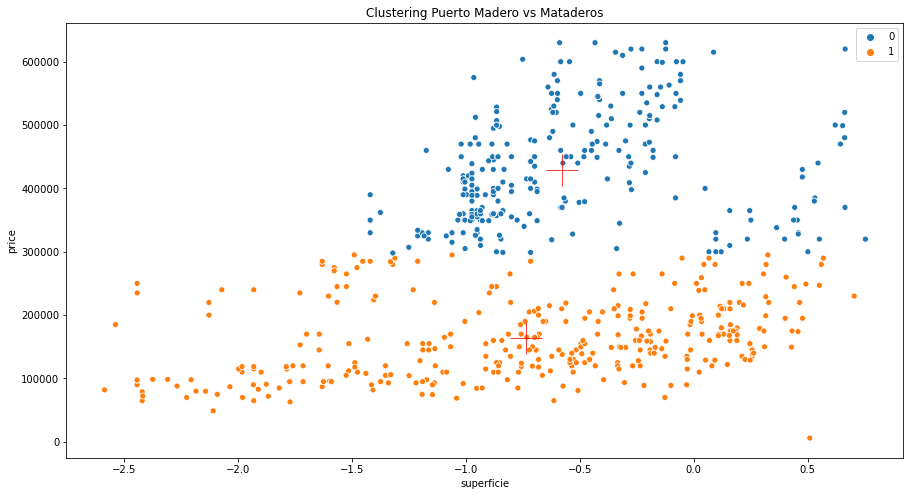

In [121]:
data_clusterl3_1 = data_clusterl3_[data_clusterl3_['l3_Puerto Madero'] == 1]
data_clusterl3_2 = data_clusterl3_[data_clusterl3_['l3_Mataderos'] == 1]
data_clusterl3_1 = data_clusterl3_1.append(data_clusterl3_2)

#data_clusterl3_1 = data_clusterl3_[data_clusterl3_.l3_labeled == 48]
#data_clusterl3_2 = data_clusterl3_[data_clusterl3_.l3_labeled == 70]
#data_clusterl3_1 = data_clusterl3_1.append(data_clusterl3_2)

data_clusterl3_1['l3_Puerto Madero'] = data_clusterl3_1['l3_Puerto Madero'].replace(to_replace = 1, value = 1)

cluster2.fit(data_clusterl3_1[['superficie','price']])

labels2 = cluster2.labels_
center2 = cluster2.cluster_centers_

plt.subplots(figsize=(15,8))
sns.scatterplot(x = data_clusterl3_1['superficie'], y = data_clusterl3_1['price'], hue = labels2)
sns.scatterplot(x = center2[:, 0], y = center2[:, 1], color = 'red', marker = '+', s = 1000)
plt.title('Clustering Puerto Madero vs Mataderos')
plt.show()

<font color=blue>

El clustering nos muestra que utilizando como variables "superficie" y "precio", hay menor distancia entre los centroides de los clusters "Palermo vs Tigre" a "Mataderos vs Puerto Madero", específicamente en el eje vertical del precio.

In [122]:
data6.columns

Index(['price', 'habitaciones', 'superficie', 'l2_Bs.As. G.B.A. Zona Norte',
       'l2_Bs.As. G.B.A. Zona Oeste', 'l2_Bs.As. G.B.A. Zona Sur',
       'l2_Capital Federal', 'l3_Abasto', 'l3_Agronomía', 'l3_Almagro',
       ...
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       'l3_Villa Urquiza', 'l3_Villa del Parque', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Oficina', 'property_type_PH'],
      dtype='object', length=101)

In [123]:
'property_type_Casa','property_type_Departamento', 'property_type_Local comercial','property_type_Oficina', 'property_type_PH'

('property_type_Casa',
 'property_type_Departamento',
 'property_type_Local comercial',
 'property_type_Oficina',
 'property_type_PH')

In [124]:
cluster2 = KMeans(n_clusters = 2)

#data_clusterl3_ =  data5[['l3_labeled', 'price', 'surface_total']]

data_cluster_ptype_ =  data6[['price', 'habitaciones', 'superficie',
       'l2_Bs.As. G.B.A. Zona Norte', 'l2_Bs.As. G.B.A. Zona Oeste',
       'l2_Bs.As. G.B.A. Zona Sur', 'l2_Capital Federal', 'l3_Abasto',
       'l3_Agronomía', 'l3_Almagro', 'l3_Almirante Brown',
       'l3_Avellaneda', 'l3_Balvanera', 'l3_Barracas', 'l3_Barrio Norte',
       'l3_Belgrano', 'l3_Berazategui', 'l3_Boca', 'l3_Boedo',
       'l3_Caballito', 'l3_Catalinas', 'l3_Cañuelas',
       'l3_Centro / Microcentro', 'l3_Chacarita', 'l3_Coghlan',
       'l3_Colegiales', 'l3_Congreso', 'l3_Constitución', 'l3_Escobar',
       'l3_Esteban Echeverría', 'l3_Ezeiza', 'l3_Florencio Varela',
       'l3_Flores', 'l3_Floresta', 'l3_General Rodríguez',
       'l3_General San Martín', 'l3_Hurlingham', 'l3_Ituzaingó',
       'l3_José C Paz', 'l3_La Matanza', 'l3_La Plata', 'l3_Lanús',
       'l3_Las Cañitas', 'l3_Liniers', 'l3_Lomas de Zamora',
       'l3_Malvinas Argentinas', 'l3_Marcos Paz', 'l3_Mataderos',
       'l3_Merlo', 'l3_Monserrat', 'l3_Monte Castro', 'l3_Moreno',
       'l3_Morón', 'l3_Nuñez', 'l3_Once', 'l3_Palermo',
       'l3_Parque Avellaneda', 'l3_Parque Centenario',
       'l3_Parque Chacabuco', 'l3_Parque Chas', 'l3_Parque Patricios',
       'l3_Paternal', 'l3_Pilar', 'l3_Pompeya', 'l3_Presidente Perón',
       'l3_Puerto Madero', 'l3_Quilmes', 'l3_Recoleta', 'l3_Retiro',
       'l3_Saavedra', 'l3_San Cristobal', 'l3_San Fernando',
       'l3_San Isidro', 'l3_San Miguel', 'l3_San Nicolás', 'l3_San Telmo',
       'l3_San Vicente', 'l3_Tigre', 'l3_Tres de Febrero',
       'l3_Tribunales', 'l3_Velez Sarsfield', 'l3_Versalles',
       'l3_Vicente López', 'l3_Villa Crespo', 'l3_Villa Devoto',
       'l3_Villa General Mitre', 'l3_Villa Lugano', 'l3_Villa Luro',
       'l3_Villa Ortuzar', 'l3_Villa Pueyrredón', 'l3_Villa Real',
       'l3_Villa Riachuelo', 'l3_Villa Santa Rita', 'l3_Villa Soldati',
       'l3_Villa Urquiza', 'l3_Villa del Parque', 'property_type_Casa',
       'property_type_Departamento', 'property_type_Local comercial',
       'property_type_Oficina', 'property_type_PH']]

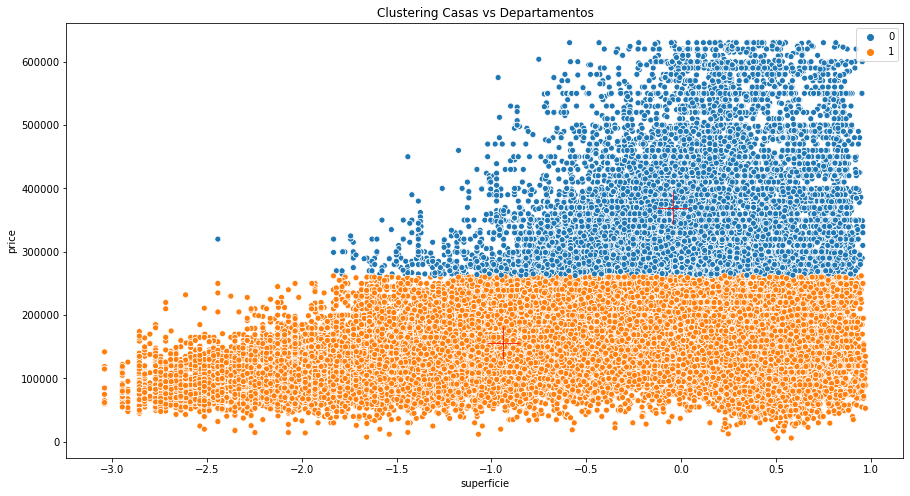

In [125]:
data_cluster_ptype_1 = data_cluster_ptype_[data_cluster_ptype_['property_type_Casa'] == 1]
data_cluster_ptype_2 = data_cluster_ptype_[data_cluster_ptype_['property_type_Departamento'] == 1]
data_cluster_ptype_1 = data_cluster_ptype_1.append(data_cluster_ptype_2)

data_cluster_ptype_1['property_type_Casa'] = data_cluster_ptype_1['property_type_Casa'].replace(to_replace = 1, value = 1)

cluster2.fit(data_cluster_ptype_1[['superficie','price']])

labels2 = cluster2.labels_
center2 = cluster2.cluster_centers_

plt.subplots(figsize=(15,8))
sns.scatterplot(x = data_cluster_ptype_1['superficie'], y = data_cluster_ptype_1['price'], hue = labels2)
sns.scatterplot(x = center2[:, 0], y = center2[:, 1], color = 'red', marker = '+', s = 1000)
plt.title('Clustering Casas vs Departamentos')
plt.show()

In [126]:
data5.property_type.value_counts()

Departamento       58601
Casa               12019
PH                  8841
Oficina              123
Local comercial        7
Name: property_type, dtype: int64

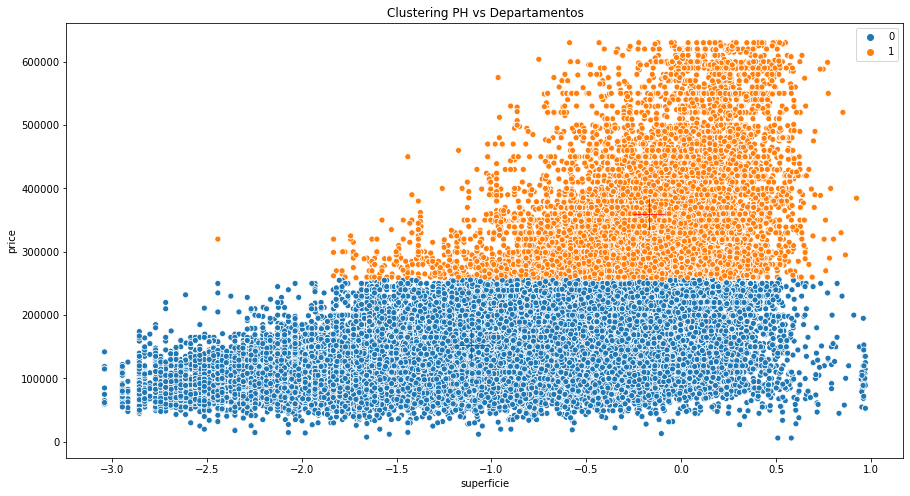

In [127]:
data_cluster_ptype_1 = data_cluster_ptype_[data_cluster_ptype_['property_type_PH'] == 1]
data_cluster_ptype_2 = data_cluster_ptype_[data_cluster_ptype_['property_type_Departamento'] == 1]
data_cluster_ptype_1 = data_cluster_ptype_1.append(data_cluster_ptype_2)

data_cluster_ptype_1['property_type_PH'] = data_cluster_ptype_1['property_type_PH'].replace(to_replace = 1, value = 1)

cluster2.fit(data_cluster_ptype_1[['superficie','price']])

labels2 = cluster2.labels_
center2 = cluster2.cluster_centers_

plt.subplots(figsize=(15,8))
sns.scatterplot(x = data_cluster_ptype_1['superficie'], y = data_cluster_ptype_1['price'], hue = labels2)
sns.scatterplot(x = center2[:, 0], y = center2[:, 1], color = 'red', marker = '+', s = 1000)
plt.title('Clustering PH vs Departamentos')
plt.show()

<font color=blue>

El clustering nos muestra que utilizando como variables "superficie" y "precio", hay una distancia muy similar entre los centroides de los clusters "Casas vs Departamentos" y "PH vs Departamentos"